<a href="https://colab.research.google.com/github/rohit1998-pixel/rohit1998-pixel/blob/main/CeO2_DPV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/CeO2_DPV.csv')
print(df.head())


       V        I2        I3        I4        I5        I6        I7  \
0 -1.200  0.000047  0.000045  0.000044  0.000043  0.000042  0.000042   
1 -1.197  0.000047  0.000045  0.000044  0.000043  0.000042  0.000042   
2 -1.194  0.000047  0.000045  0.000043  0.000042  0.000042  0.000042   
3 -1.191  0.000046  0.000045  0.000043  0.000042  0.000042  0.000041   
4 -1.188  0.000046  0.000045  0.000043  0.000042  0.000042  0.000041   

         I8        I9  
0  0.000041  0.000041  
1  0.000041  0.000041  
2  0.000041  0.000041  
3  0.000041  0.000041  
4  0.000041  0.000041  


In [65]:
Potential = df['V'].values
print(Potential)
I = ['I2','I3','I4','I5','I6','I7','I8','I9']  # example list of Y-axis column names
I = [df[I].values]
print(I)

[-1.2   -1.197 -1.194 -1.191 -1.188 -1.185 -1.182 -1.179 -1.176 -1.173
 -1.17  -1.167 -1.164 -1.161 -1.158 -1.155 -1.152 -1.149 -1.146 -1.143
 -1.14  -1.137 -1.134 -1.131 -1.128 -1.125 -1.122 -1.119 -1.116 -1.113
 -1.11  -1.107 -1.104 -1.101 -1.098 -1.095 -1.092 -1.089 -1.086 -1.083
 -1.08  -1.077 -1.074 -1.071 -1.068 -1.065 -1.062 -1.059 -1.056 -1.053
 -1.05  -1.047 -1.044 -1.041 -1.038 -1.035 -1.032 -1.029 -1.026 -1.023
 -1.02  -1.017 -1.014 -1.011 -1.008 -1.005 -1.002 -0.999 -0.996 -0.993
 -0.99  -0.987 -0.984 -0.981 -0.978 -0.975 -0.972 -0.969 -0.966 -0.963
 -0.96  -0.957 -0.954 -0.951 -0.948 -0.945 -0.942 -0.939 -0.936 -0.933
 -0.93  -0.927 -0.924 -0.921 -0.918 -0.915 -0.912 -0.909 -0.906 -0.903
 -0.9   -0.897 -0.894 -0.891 -0.888 -0.885 -0.882 -0.879 -0.876 -0.873
 -0.87  -0.867 -0.864 -0.861 -0.858 -0.855 -0.852 -0.849 -0.846 -0.843
 -0.84  -0.837 -0.834 -0.831 -0.828 -0.825 -0.822 -0.819 -0.816 -0.813
 -0.81  -0.807 -0.804 -0.801 -0.798 -0.795 -0.792 -0.789 -0.786 -0.783
 -0.78

In [66]:
def get_min_max1():
    return -0.85, -0.7

min_Potential_range1, max_Potential_range1 = get_min_max1()
Potential_filtered_range1 = Potential[(Potential >= min_Potential_range1) & (Potential <= max_Potential_range1)]
print("min_Potential_range1 =", min_Potential_range1)
print("max_Potential_range1 =", max_Potential_range1)

def get_min_max2():
    return -0.59, -0.47

min_Potential_range2, max_Potential_range2 = get_min_max2()
Potential_filtered_range1 = Potential[(Potential >= min_Potential_range2) & (Potential <= max_Potential_range2)]
print("min_Potential_range2 =", min_Potential_range2)
print("max_Potential_range2 =", max_Potential_range2)

def get_min_max3():
    return -0.15, -0.03

min_Potential_range3, max_Potential_range3 = get_min_max3()
Potential_filtered_range3 = Potential[(Potential >= min_Potential_range3) & (Potential <= max_Potential_range3)]
print("min_Potential_range3 =", min_Potential_range3)
print("max_Potential_range3 =", max_Potential_range3)

min_Potential_range1 = -0.85
max_Potential_range1 = -0.7
min_Potential_range2 = -0.59
max_Potential_range2 = -0.47
min_Potential_range3 = -0.15
max_Potential_range3 = -0.03


3.7.1
+-----------+--------------------------+-------------------+--------------------------+-------------------+--------------------------+-------------------+
|   Ion No. |   Range 1 Peak Potential |   Range 1 Current |   Range 2 Peak Potential |   Range 2 Current |   Range 3 Peak Potential |   Range 3 Current |
+===========+==========================+===================+==========================+===================+==========================+===================+
|         1 |                   -0.798 |          5.54e-05 |                   -0.555 |          6.32e-05 |                   -0.096 |          6.55e-05 |
+-----------+--------------------------+-------------------+--------------------------+-------------------+--------------------------+-------------------+
|         2 |                   -0.786 |          5.79e-05 |                   -0.546 |          6.45e-05 |                   -0.087 |          6.83e-05 |
+-----------+--------------------------+-------------------+----

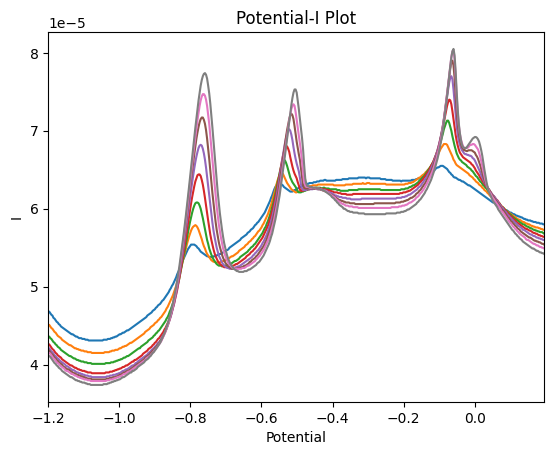

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
from tabulate import tabulate

# Assuming X and Y are your data arrays
I_array = I[0] # Extract the NumPy array from the list

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Potential ranges (using your defined functions)
potential_ranges = [
    get_min_max1(),
    get_min_max2(),
    get_min_max3()
]

def print_table():
    headers = ["Ion No."]
    data = []
    for i, potential_range in enumerate(potential_ranges):
        headers.append(f"Range {i+1} Peak Potential")
        headers.append(f"Range {i+1} Current")
        max_potentials, max_currents = find_max_in_range(potential_range, I_array)
        if i == 0:  # Initialize data list for the first range
            for j in range(I_array.shape[1]):
                data.append([j+1])
        for j in range(I_array.shape[1]):
            data[j].append(max_potentials[j])
            data[j].append(max_currents[j])

    print(tabulate(data, headers, tablefmt="grid"))

print_table()

# Plot the data with x-axis range (you can adjust this for each range if needed)
plt.plot(Potential, I_array)
plt.xlim(Potential.min(), Potential.max())
plt.xlabel("Potential")
plt.ylabel("I")
plt.title("Potential-I Plot")
plt.show()

3.7.1
+--------------+-------------------------+------------------+-------------------------+------------------+-------------------------+------------------+
|   Serial No. |   Cd(II) Peak Potential |   Cd(II) Current |   Pb(II) Peak Potential |   Pb(II) Current |   Cu(II) Peak Potential |   Cu(II) Current |
+==============+=========================+==================+=========================+==================+=========================+==================+
|            1 |                  -0.798 |         5.54e-05 |                  -0.555 |         6.32e-05 |                  -0.096 |         6.55e-05 |
+--------------+-------------------------+------------------+-------------------------+------------------+-------------------------+------------------+
|            2 |                  -0.786 |         5.79e-05 |                  -0.546 |         6.45e-05 |                  -0.087 |         6.83e-05 |
+--------------+-------------------------+------------------+---------------------

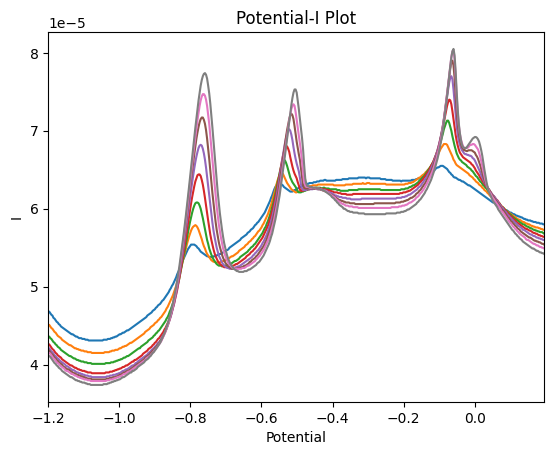

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
from tabulate import tabulate

# Assuming X and Y are your data arrays
I_array = I[0] # Extract the NumPy array from the list

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Potential ranges (using your defined functions)
potential_ranges = [
    get_min_max1(),
    get_min_max2(),
    get_min_max3()
]

# Ion labels for each range
ion_labels = ["Cd(II)", "Pb(II)", "Cu(II)"]

def print_table():
    headers = ["Serial No."]
    data = []
    for i, potential_range in enumerate(potential_ranges):
        headers.append(f"{ion_labels[i]} Peak Potential")
        headers.append(f"{ion_labels[i]} Current")
        max_potentials, max_currents = find_max_in_range(potential_range, I_array)
        if i == 0:  # Initialize data list for the first range
            for j in range(I_array.shape[1]):
                data.append([j+1])
        for j in range(I_array.shape[1]):
            data[j].append(max_potentials[j])
            data[j].append(max_currents[j])

    print(tabulate(data, headers, tablefmt="grid"))

print_table()

# Plot the data with x-axis range (you can adjust this for each range if needed)
plt.plot(Potential, I_array)
plt.xlim(Potential.min(), Potential.max())
plt.xlabel("Potential")
plt.ylabel("I")
plt.title("Potential-I Plot")
plt.show()

3.7.1
+-----------+--------------------------+-------------------+--------------------+--------------------------+-------------------+--------------------+--------------------------+-------------------+--------------------+
|   Ion No. |   Range 1 Peak Potential |   Range 1 Current |   Cd(II) Peak Area |   Range 2 Peak Potential |   Range 2 Current |   Pb(II) Peak Area |   Range 3 Peak Potential |   Range 3 Current |   Cu(II) Peak Area |
+===========+==========================+===================+====================+==========================+===================+====================+==========================+===================+====================+
|         1 |                   -0.798 |          5.54e-05 |        7.92465e-06 |                   -0.555 |          6.32e-05 |        7.3002e-06  |                   -0.096 |          6.55e-05 |        7.7445e-06  |
+-----------+--------------------------+-------------------+--------------------+--------------------------+--------------

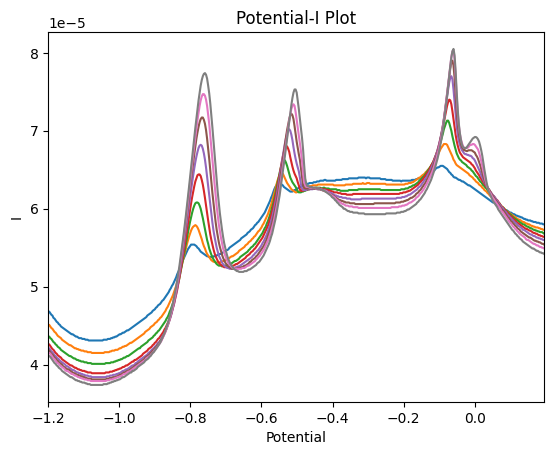

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
from tabulate import tabulate
from scipy.integrate import trapz  # Import trapz for integration

# Assuming X and Y are your data arrays
I_array = I[0] # Extract the NumPy array from the list

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Potential ranges (using your defined functions)
potential_ranges = [
    get_min_max1(),
    get_min_max2(),
    get_min_max3()
]

# Function to calculate peak area (defined outside of print_table)
def calculate_peak_area(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    peak_areas = []
    for i in range(I_in_range.shape[1]):
        # Example using trapezoidal rule for integration - adjust as needed
        area = trapz(I_in_range[:, i], Potential[indices_in_range])
        peak_areas.append(area)
    return peak_areas # Return the calculated peak areas

def print_table():
    headers = ["Ion No."]
    data = []
    for i, potential_range in enumerate(potential_ranges):
        headers.append(f"Range {i+1} Peak Potential")
        headers.append(f"Range {i+1} Current")
        headers.append(f"{ion_labels[i]} Peak Area")
        max_potentials, max_currents = find_max_in_range(potential_range, I_array)
        peak_areas = calculate_peak_area(potential_range, I_array)  # Call the function to get peak areas
        if i == 0:  # Initialize data list for the first range
            for j in range(I_array.shape[1]):
                data.append([j+1])
        for j in range(I_array.shape[1]):
            data[j].append(max_potentials[j])
            data[j].append(max_currents[j])
            data[j].append(peak_areas[j])

    print(tabulate(data, headers, tablefmt="grid"))

print_table()

# Plot the data with x-axis range (you can adjust this for each range if needed)
plt.plot(Potential, I_array)
plt.xlim(Potential.min(), Potential.max())
plt.xlabel("Potential")
plt.ylabel("I")
plt.title("Potential-I Plot")
plt.show()

3.7.1
+-----------+--------------------+--------------------+--------------------+
|   Ion No. |   Cd(II) Peak Area |   Pb(II) Peak Area |   Cu(II) Peak Area |
+===========+====================+====================+====================+
|         1 |        1.6533e-06  |        1.88595e-06 |        1.96065e-06 |
+-----------+--------------------+--------------------+--------------------+
|         2 |        1.72305e-06 |        1.91895e-06 |        2.03835e-06 |
+-----------+--------------------+--------------------+--------------------+
|         3 |        1.80735e-06 |        1.9635e-06  |        2.1141e-06  |
+-----------+--------------------+--------------------+--------------------+
|         4 |        1.90995e-06 |        2.0127e-06  |        2.18175e-06 |
+-----------+--------------------+--------------------+--------------------+
|         5 |        2.01885e-06 |        2.07285e-06 |        2.2476e-06  |
+-----------+--------------------+--------------------+---------------

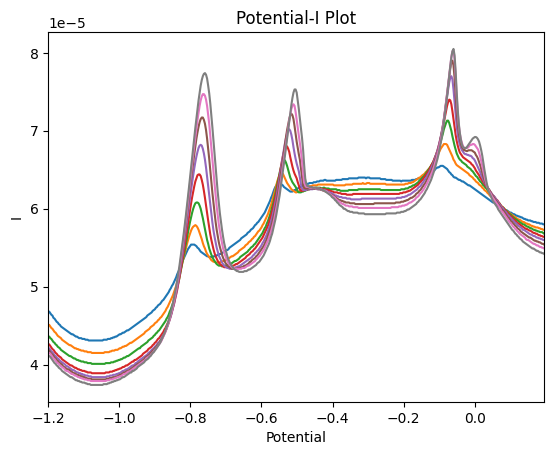

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
from tabulate import tabulate
from scipy.integrate import trapz  # Import trapz for integration

# Assuming X and Y are your data arrays
I_array = I[0] # Extract the NumPy array from the list

# Function to find peak area within a range
def calculate_peak_area(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    potential_in_range = Potential[indices_in_range]

    peak_areas = []
    for col in range(I_in_range.shape[1]):
        # Find the index of the maximum current within the range for this column
        peak_index = np.argmax(I_in_range[:, col])

        # Extract data around the peak for better area calculation (adjust window as needed)
        window_size = 5  # Adjust this value to control the width of the integration window
        start_index = max(0, peak_index - window_size)
        end_index = min(I_in_range.shape[0], peak_index + window_size + 1)

        area = trapz(I_in_range[start_index:end_index, col],
                     potential_in_range[start_index:end_index])
        peak_areas.append(area)

    return peak_areas

# Potential ranges (using your defined functions)
potential_ranges = [
    get_min_max1(),
    get_min_max2(),
    get_min_max3()
]

# Ion labels for each range
ion_labels = ["Cd(II)", "Pb(II)", "Cu(II)"]

def print_table():
    headers = ["Ion No."]
    data = []
    for i, potential_range in enumerate(potential_ranges):
        headers.append(f"{ion_labels[i]} Peak Area")
        peak_areas = calculate_peak_area(potential_range, I_array)
        if i == 0:  # Initialize data list for the first range
            for j in range(I_array.shape[1]):
                data.append([j+1])
        for j in range(I_array.shape[1]):
            data[j].append(peak_areas[j])

    print(tabulate(data, headers, tablefmt="grid"))

print_table()

# Plot the data with x-axis range (you can adjust this for each range if needed)
plt.plot(Potential, I_array)
plt.xlim(Potential.min(), Potential.max())
plt.xlabel("Potential")
plt.ylabel("I")
plt.title("Potential-I Plot")
plt.show()

3.7.1
+-----------+--------------------------+-------------------+--------------------+--------------------------+-------------------+--------------------+--------------------------+-------------------+--------------------+
|   Ion No. |   Range 1 Peak Potential |   Range 1 Current |   Cd(II) Peak Area |   Range 2 Peak Potential |   Range 2 Current |   Pb(II) Peak Area |   Range 3 Peak Potential |   Range 3 Current |   Cu(II) Peak Area |
+===========+==========================+===================+====================+==========================+===================+====================+==========================+===================+====================+
|         1 |                   -0.798 |          5.54e-05 |        7.92465e-06 |                   -0.555 |          6.32e-05 |        7.3002e-06  |                   -0.096 |          6.55e-05 |        7.7445e-06  |
+-----------+--------------------------+-------------------+--------------------+--------------------------+--------------

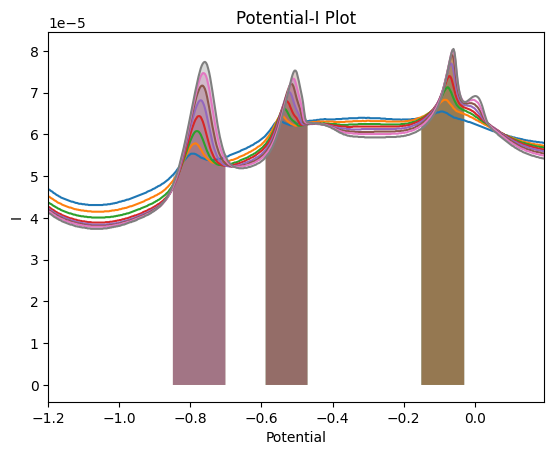

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
from tabulate import tabulate
from scipy.integrate import trapz  # Import trapz for integration

# Assuming X and Y are your data arrays
I_array = I[0]  # Extract the NumPy array from the list

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Potential ranges (using your defined functions)
potential_ranges = [
    get_min_max1(),
    get_min_max2(),
    get_min_max3()
]

# Function to calculate peak area (defined outside of print_table)
def calculate_peak_area(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    peak_areas = []
    for i in range(I_in_range.shape[1]):
        # Example using trapezoidal rule for integration - adjust as needed
        area = trapz(I_in_range[:, i], Potential[indices_in_range])
        peak_areas.append(area)
    return peak_areas  # Return the calculated peak areas

def print_table():
    headers = ["Ion No."]
    data = []
    for i, potential_range in enumerate(potential_ranges):
        headers.append(f"Range {i+1} Peak Potential")
        headers.append(f"Range {i+1} Current")
        headers.append(f"{ion_labels[i]} Peak Area")
        max_potentials, max_currents = find_max_in_range(potential_range, I_array)
        peak_areas = calculate_peak_area(potential_range, I_array)  # Call the function to get peak areas
        if i == 0:  # Initialize data list for the first range
            for j in range(I_array.shape[1]):
                data.append([j+1])
        for j in range(I_array.shape[1]):
            data[j].append(max_potentials[j])
            data[j].append(max_currents[j])
            data[j].append(peak_areas[j])

    print(tabulate(data, headers, tablefmt="grid"))

print_table()

# Plot the data with x-axis range (you can adjust this for each range if needed)
plt.plot(Potential, I_array)
plt.xlim(Potential.min(), Potential.max())
plt.xlabel("Potential")
plt.ylabel("I")
plt.title("Potential-I Plot")

# Fill the area under the peak for each range
for potential_range in potential_ranges:
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_array[indices_in_range, :]
    for col in range(I_in_range.shape[1]):
        plt.fill_between(Potential[indices_in_range], I_in_range[:, col], alpha=0.3)

plt.show()

+-----------+--------------------------+-------------------+---------------------+--------------------------+-------------------+---------------------+--------------------------+-------------------+---------------------+
|   Ion No. |   Range 1 Peak Potential |   Range 1 Current |   Range 1 Peak Area |   Range 2 Peak Potential |   Range 2 Current |   Range 2 Peak Area |   Range 3 Peak Potential |   Range 3 Current |   Range 3 Peak Area |
+===========+==========================+===================+=====================+==========================+===================+=====================+==========================+===================+=====================+
|         1 |                   -0.798 |          5.54e-05 |         6.61748e-07 |                   -0.555 |          6.32e-05 |         1.51952e-06 |                   -0.096 |          6.55e-05 |         1.8156e-06  |
+-----------+--------------------------+-------------------+---------------------+--------------------------+-------

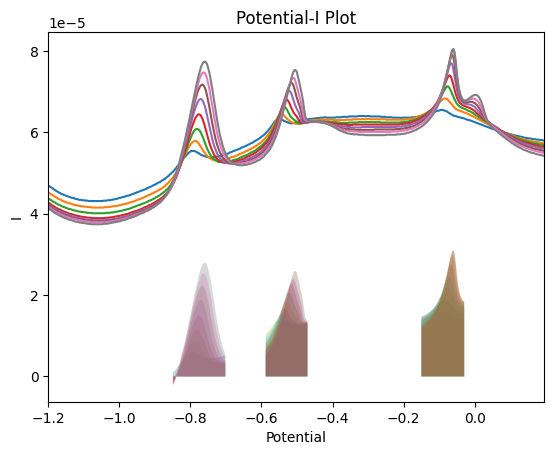

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from tabulate import tabulate
from scipy.integrate import trapz  # Import trapz for integration

# Load data from CSV file
data = pd.read_csv('/content/CeO2_DPV.csv')

# Assuming the CSV file has two columns: Potential and Current
Potential = data['V'].values
I_array = I[0]  # Extract the NumPy array from the list

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Potential ranges (using your defined functions)
potential_ranges = [
    get_min_max1(),
    get_min_max2(),
    get_min_max3()
]

# Function to calculate peak area (defined outside of print_table)
def calculate_peak_area(potential_range, I_data, baseline):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    peak_areas = []
    for i in range(I_in_range.shape[1]):
        # Subtract baseline current
        I_in_range_baseline_subtracted = I_in_range[:, i] - baseline
        # Example using trapezoidal rule for integration - adjust as needed
        area = trapz(I_in_range_baseline_subtracted, Potential[indices_in_range])
        peak_areas.append(area)
    return peak_areas  # Return the calculated peak areas

def print_table():
    headers = ["Ion No."]
    data = []
    for i, potential_range in enumerate(potential_ranges):
        headers.append(f"Range {i+1} Peak Potential")
        headers.append(f"Range {i+1} Current")
        headers.append(f"Range {i+1} Peak Area")
        max_potentials, max_currents = find_max_in_range(potential_range, I_array)
        # Calculate baseline current (e.g., average of 10 points at the start and end of the range)
        baseline = np.mean(np.concatenate((I_array[:10], I_array[-10:])))
        peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
        if i == 0:  # Initialize data list for the first range
            for j in range(I_array.shape[1]):
                data.append([j+1])
        for j in range(I_array.shape[1]):
            data[j].append(max_potentials[j])
            data[j].append(max_currents[j])
            data[j].append(peak_areas[j])

    print(tabulate(data, headers, tablefmt="grid"))

print_table()

# Plot the data with x-axis range (you can adjust this for each range if needed)
plt.plot(Potential, I_array)
plt.xlim(Potential.min(), Potential.max())
plt.xlabel("Potential")
plt.ylabel("I")
plt.title("Potential-I Plot")

# Fill the area under the peak for each range
for potential_range in potential_ranges:
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_array[indices_in_range, :]
    baseline = np.mean(np.concatenate((I_array[:10], I_array[-10:])))
    for col in range(I_in_range.shape[1]):
        I_in_range_baseline_subtracted = I_in_range[:, col] - baseline
        plt.fill_between(Potential[indices_in_range], I_in_range_baseline_subtracted, alpha=0.3)

plt.show()

  Serial No.    Cd(II) Peak Potential    Cd(II) Current    Cd(II) Peak Area    Pb(II) Peak Potential    Pb(II) Current    Pb(II) Peak Area    Cu(II) Peak Potential    Cu(II) Current    Cu(II) Peak Area
------------  -----------------------  ----------------  ------------------  -----------------------  ----------------  ------------------  -----------------------  ----------------  ------------------
           1                   -0.798          5.54e-05         3.55549e-07                   -0.555          6.32e-05         2.66841e-07                   -0.096          6.55e-05         1.2075e-08
           2                   -0.786          5.79e-05         4.17304e-07                   -0.546          6.45e-05         2.77809e-07                   -0.087          6.83e-05         1.56113e-07
           3                   -0.783          6.08e-05         5.67581e-07                   -0.537          6.62e-05         3.25266e-07                   -0.078          7.13e-05         2.9

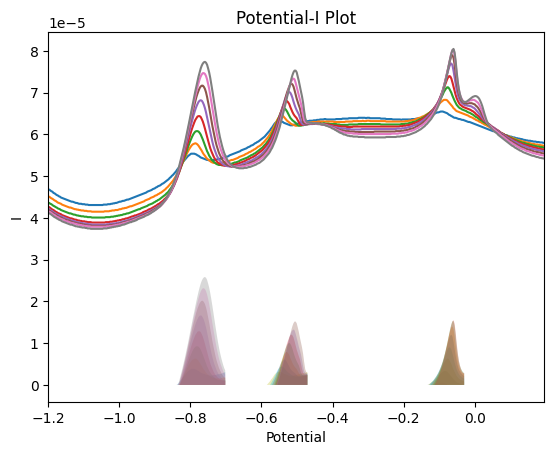

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from tabulate import tabulate
from scipy.integrate import trapz  # Import trapz for integration

# Load data from CSV file
data = pd.read_csv('/content/CeO2_DPV.csv')

# Assuming the CSV file has two columns: Potential and Current
Potential = data['V'].values
I_array = I[0]  # Extract the NumPy array from the list

# Define the potential ranges and corresponding metal ions
potential_ranges = {
    'Cd(II)': get_min_max1(),
    'Pb(II)': get_min_max2(),
    'Cu(II)': get_min_max3()
}

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Function to calculate peak area
def calculate_peak_area(potential_range, I_data, baseline):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    peak_areas = []
    for i in range(I_in_range.shape[1]):
        # Subtract baseline current, ensuring values are non-negative
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, i] - baseline, 0)  # Clip negative values to 0
        # Calculate the peak area using trapezoidal rule for integration
        area = trapz(I_in_range_baseline_subtracted, Potential[indices_in_range])  # Integrate within the range
        peak_areas.append(area)
    return peak_areas  # Return the calculated peak areas

def print_table():
    headers = ["Serial No."]
    data = []
    for metal_ion, potential_range in potential_ranges.items():
        headers.append(f"{metal_ion} Peak Potential")
        headers.append(f"{metal_ion} Current")
        headers.append(f"{metal_ion} Peak Area")
        max_potentials, max_currents = find_max_in_range(potential_range, I_array)
        # Calculate baseline current for the specific range
        min_potential, max_potential = potential_range
        baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
        # More robust baseline calculation:
        baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
        baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
        baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
        peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
        if metal_ion == 'Cd(II)':  # Initialize data list for the first range
            for j in range(I_array.shape[1]):
                data.append([j+1])
        for j in range(I_array.shape[1]):
            data[j].append(max_potentials[j])
            data[j].append(max_currents[j])
            data[j].append(peak_areas[j])

    print(tabulate(data, headers, tablefmt="solid_table"))

print_table()

# Plot the data with x-axis range (you can adjust this for each range if needed)
plt.plot(Potential, I_array)
plt.xlim(Potential.min(), Potential.max())
plt.xlabel("Potential")
plt.ylabel("I")
plt.title("Potential-I Plot")

# Fill the area under the peak for each range
for metal_ion, potential_range in potential_ranges.items():
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_array[indices_in_range, :]
    # Use the more robust baseline calculation as well for plotting
    baseline_start = I_array[indices_in_range[:int(len(indices_in_range) * 0.1)], :]
    baseline_end = I_array[indices_in_range[-int(len(indices_in_range) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    for col in range(I_in_range.shape[1]):
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, col] - baseline, 0)  # Clip negative values to 0
        plt.fill_between(Potential[indices_in_range], I_in_range_baseline_subtracted, alpha=0.3, label=f'{metal_ion} Peak')  # Filling within the range

plt.show()

Table for Cd(II):
  Serial No.    Cd(II) Peak Potential    Cd(II) Current    Cd(II) Peak Area
------------  -----------------------  ----------------  ------------------
           1                   -0.798          5.54e-05         3.55549e-07
           2                   -0.786          5.79e-05         4.17304e-07
           3                   -0.783          6.08e-05         5.67581e-07
           4                   -0.777          6.44e-05         8.00081e-07
           5                   -0.771          6.82e-05         1.08703e-06
           6                   -0.768          7.17e-05         1.38525e-06
           7                   -0.765          7.47e-05         1.6506e-06
           8                   -0.759          7.74e-05         1.90548e-06
Table for Pb(II):
  Serial No.    Pb(II) Peak Potential    Pb(II) Current    Pb(II) Peak Area
------------  -----------------------  ----------------  ------------------
           1                   -0.555          6.32e-

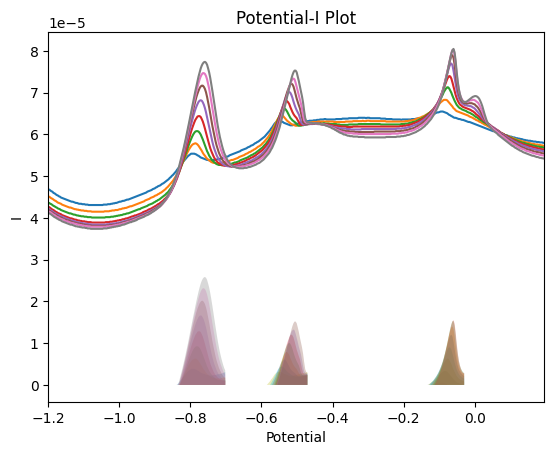

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from tabulate import tabulate
from scipy.integrate import trapz  # Import trapz for integration

# Load data from CSV file
data = pd.read_csv('/content/CeO2_DPV.csv')

# Assuming the CSV file has two columns: Potential and Current
Potential = data['V'].values
I_array = I[0]  # Extract the NumPy array from the list

# Define the potential ranges and corresponding metal ions
potential_ranges = {
    'Cd(II)': get_min_max1(),
    'Pb(II)': get_min_max2(),
    'Cu(II)': get_min_max3()
}

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Function to calculate peak area
def calculate_peak_area(potential_range, I_data, baseline):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    peak_areas = []
    for i in range(I_in_range.shape[1]):
        # Subtract baseline current, ensuring values are non-negative
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, i] - baseline, 0)  # Clip negative values to 0
        # Calculate the peak area using trapezoidal rule for integration
        area = trapz(I_in_range_baseline_subtracted, Potential[indices_in_range])  # Integrate within the range
        peak_areas.append(area)
    return peak_areas  # Return the calculated peak areas

def print_table(metal_ion, potential_range):
    headers = ["Serial No.", f"{metal_ion} Peak Potential", f"{metal_ion} Current", f"{metal_ion} Peak Area"]
    data = []
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        data.append([j+1, max_potentials[j], max_currents[j], peak_areas[j]])
    print(f"Table for {metal_ion}:")
    print(tabulate(data, headers, tablefmt="solid_table"))

for metal_ion, potential_range in potential_ranges.items():
    print_table(metal_ion, potential_range)

# Plot the data with x-axis range (you can adjust this for each range if needed)
plt.plot(Potential, I_array)
plt.xlim(Potential.min(), Potential.max())
plt.xlabel("Potential")
plt.ylabel("I")
plt.title("Potential-I Plot")

# Fill the area under the peak for each range
for metal_ion, potential_range in potential_ranges.items():
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_array[indices_in_range, :]
    # Use the more robust baseline calculation as well for plotting
    baseline_start = I_array[indices_in_range[:int(len(indices_in_range) * 0.1)], :]
    baseline_end = I_array[indices_in_range[-int(len(indices_in_range) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    for col in range(I_in_range.shape[1]):
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, col] - baseline, 0)  # Clip negative values to 0
        plt.fill_between(Potential[indices_in_range], I_in_range_baseline_subtracted, alpha=0.3, label=f'{metal_ion} Peak')  # Filling within the range

plt.show()

Table for Cd(II):
  Serial No.    Cd(II) Peak Potential    Cd(II) Current    Cd(II) Peak Area    Cd(II) Concentration
------------  -----------------------  ----------------  ------------------  ----------------------
           1                   -0.798          5.54e-05         3.55549e-07                      20
           2                   -0.786          5.79e-05         4.17304e-07                      30
           3                   -0.783          6.08e-05         5.67581e-07                      40
           4                   -0.777          6.44e-05         8.00081e-07                      50
           5                   -0.771          6.82e-05         1.08703e-06                      60
           6                   -0.768          7.17e-05         1.38525e-06                      70
           7                   -0.765          7.47e-05         1.6506e-06                       80
           8                   -0.759          7.74e-05         1.90548e-06       

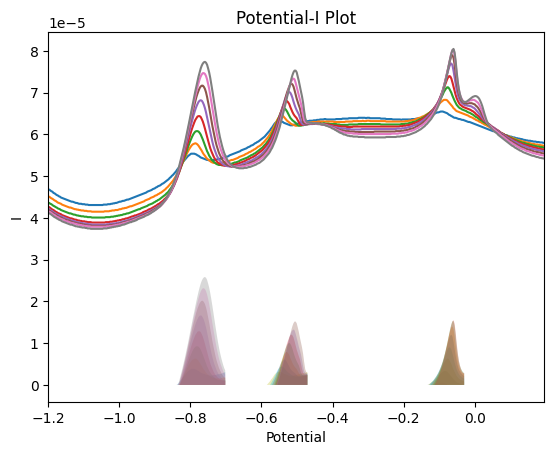

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from tabulate import tabulate
from scipy.integrate import trapz  # Import trapz for integration

# Load data from CSV file
data = pd.read_csv('/content/CeO2_DPV.csv')

# Assuming the CSV file has two columns: Potential and Current
Potential = data['V'].values
I_array = I[0]  # Extract the NumPy array from the list

# Define the potential ranges and corresponding metal ions
potential_ranges = {
    'Cd(II)': get_min_max1(),
    'Pb(II)': get_min_max2(),
    'Cu(II)': get_min_max3()
}

# Define the concentrations for each metal ion
concentrations = {
    'Cd(II)': [20,30, 40, 50, 60, 70, 80, 90],  # Concentrations for Cd(II) in uM
    'Pb(II)': [30, 40, 50, 60, 70, 80, 90, 100],  # Concentrations for Pb(II) in uM
    'Cu(II)': [400, 500, 600, 700, 800, 900, 1000, 1100]   # Concentrations for Cu(II) in uM
}

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Function to calculate peak area
def calculate_peak_area(potential_range, I_data, baseline):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    peak_areas = []
    for i in range(I_in_range.shape[1]):
        # Subtract baseline current, ensuring values are non-negative
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, i] - baseline, 0)  # Clip negative values to 0
        # Calculate the peak area using trapezoidal rule for integration
        area = trapz(I_in_range_baseline_subtracted, Potential[indices_in_range])  # Integrate within the range
        peak_areas.append(area)
    return peak_areas  # Return the calculated peak areas

def print_table(metal_ion, potential_range, concentrations):
    headers = ["Serial No.", f"{metal_ion} Peak Potential", f"{metal_ion} Current", f"{metal_ion} Peak Area", f"{metal_ion} Concentration"]
    data = []
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        data.append([j+1, max_potentials[j], max_currents[j], peak_areas[j], concentrations[j]])
    print(f"Table for {metal_ion}:")
    print(tabulate(data, headers, tablefmt="solid_table"))

for metal_ion, potential_range in potential_ranges.items():
    concentrations_for_metal = concentrations[metal_ion]  # Use the 'concentrations' dictionary here
    print_table(metal_ion, potential_range, concentrations_for_metal)


# Plot the data with x-axis range (you can adjust this for each range if needed)
plt.plot(Potential, I_array)
plt.xlim(Potential.min(), Potential.max())
plt.xlabel("Potential")
plt.ylabel("I")
plt.title("Potential-I Plot")

# Fill the area under the peak for each range
for metal_ion, potential_range in potential_ranges.items():
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_array[indices_in_range, :]
    # Use the more robust baseline calculation as well for plotting
    baseline_start = I_array[indices_in_range[:int(len(indices_in_range) * 0.1)], :]
    baseline_end = I_array[indices_in_range[-int(len(indices_in_range) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    for col in range(I_in_range.shape[1]):
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, col] - baseline, 0)  # Clip negative values to 0
        plt.fill_between(Potential[indices_in_range], I_in_range_baseline_subtracted, alpha=0.3, label=f'{metal_ion} Peak')  # Filling within the range

plt.show()

Table for Cd(II):
  Serial No.    Cd(II) Peak Potential    Cd(II) Current    Cd(II) Peak Area    Cd(II) Concentration
------------  -----------------------  ----------------  ------------------  ----------------------
           1                 0                 0                  0                        0
           2                 0.307692          0.113636           0.0398438                0.142857
           3                 0.384615          0.245455           0.136802                 0.285714
           4                 0.538462          0.409091           0.286809                 0.428571
           5                 0.692308          0.581818           0.471946                 0.571429
           6                 0.769231          0.740909           0.664357                 0.714286
           7                 0.846154          0.877273           0.835558                 0.857143
           8                 1                 1                  1                      

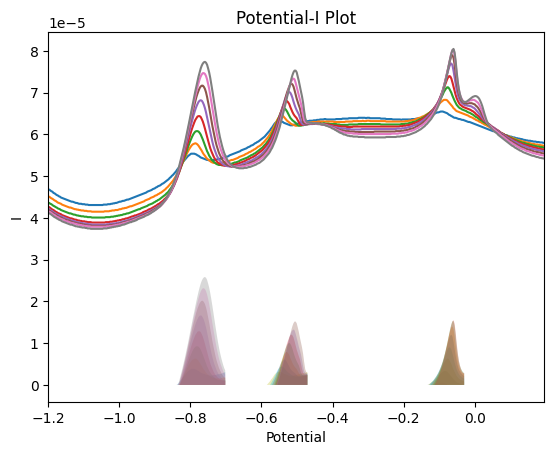

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from tabulate import tabulate
from scipy.integrate import trapz  # Import trapz for integration

# Load data from CSV file
data = pd.read_csv('/content/CeO2_DPV.csv')

# Assuming the CSV file has two columns: Potential and Current
Potential = data['V'].values
I_array = I[0]  # Extract the NumPy array from the list

# Define the potential ranges and corresponding metal ions
potential_ranges = {
    'Cd(II)': get_min_max1(),
    'Pb(II)': get_min_max2(),
    'Cu(II)': get_min_max3()
}

# Define the concentrations for each metal ion
concentrations = {
    'Cd(II)': [20,30, 40, 50, 60, 70, 80, 90],  # Concentrations for Cd(II) in uM
    'Pb(II)': [30, 40, 50, 60, 70, 80, 90, 100],  # Concentrations for Pb(II) in uM
    'Cu(II)': [400, 500, 600, 700, 800, 900, 1000, 1100]   # Concentrations for Cu(II) in uM
}

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Function to calculate peak area
def calculate_peak_area(potential_range, I_data, baseline):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    peak_areas = []
    for i in range(I_in_range.shape[1]):
        # Subtract baseline current, ensuring values are non-negative
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, i] - baseline, 0)  # Clip negative values to 0
        # Calculate the peak area using trapezoidal rule for integration
        area = trapz(I_in_range_baseline_subtracted, Potential[indices_in_range])  # Integrate within the range
        peak_areas.append(area)
    return peak_areas  # Return the calculated peak areas

def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def print_table(metal_ion, potential_range, concentrations):
    headers = ["Serial No.", f"{metal_ion} Peak Potential", f"{metal_ion} Current", f"{metal_ion} Peak Area", f"{metal_ion} Concentration"]
    data = []
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        normalized_max_potential = normalize_data(max_potentials)[j]
        normalized_max_current = normalize_data(max_currents)[j]
        normalized_peak_area = normalize_data(peak_areas)[j]
        normalized_concentration = normalize_data(concentrations)[j]
        data.append([j+1, normalized_max_potential, normalized_max_current, normalized_peak_area, normalized_concentration])
    print(f"Table for {metal_ion}:")
    print(tabulate(data, headers, tablefmt="solid_table"))

for metal_ion, potential_range in potential_ranges.items():
    concentrations_for_metal = concentrations[metal_ion]  # Use the 'concentrations' dictionary here
    print_table(metal_ion, potential_range, concentrations_for_metal)


# Plot the data with x-axis range (you can adjust this for each range if needed)
plt.plot(Potential, I_array)
plt.xlim(Potential.min(), Potential.max())
plt.xlabel("Potential")
plt.ylabel("I")
plt.title("Potential-I Plot")

# Fill the area under the peak for each range
for metal_ion, potential_range in potential_ranges.items():
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_array[indices_in_range, :]
    # Use the more robust baseline calculation as well for plotting
    baseline_start = I_array[indices_in_range[:int(len(indices_in_range) * 0.1)], :]
    baseline_end = I_array[indices_in_range[-int(len(indices_in_range) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    for col in range(I_in_range.shape[1]):
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, col] - baseline, 0)  # Clip negative values to 0
        plt.fill_between(Potential[indices_in_range], I_in_range_baseline_subtracted, alpha=0.3, label=f'{metal_ion} Peak')  # Filling within the range

plt.show()

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from tabulate import tabulate
from scipy.integrate import trapz  # Import trapz for integration
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load data from CSV file
data = pd.read_csv('/content/CeO2_DPV.csv')

# Assuming the CSV file has two columns: Potential and Current
Potential = data['V'].values
I_array = I[0]  # Extract the NumPy array from the list

# Define the potential ranges and corresponding metal ions
potential_ranges = {
    'Cd(II)': get_min_max1(),
    'Pb(II)': get_min_max2(),
    'Cu(II)': get_min_max3()
}

# Define the concentrations for each metal ion
concentrations = {
    'Cd(II)': [20, 30, 40, 50, 60, 70, 80, 90],  # Concentrations for Cd(II) in uM
    'Pb(II)': [30, 40, 50, 60, 70, 80, 90, 100],  # Concentrations for Pb(II) in uM
    'Cu(II)': [400, 500, 600, 700, 800, 900, 1000, 1100]   # Concentrations for Cu(II) in uM
}

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Function to calculate peak area
def calculate_peak_area(potential_range, I_data, baseline):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    peak_areas = []
    for i in range(I_in_range.shape[1]):
        # Subtract baseline current, ensuring values are non-negative
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, i] - baseline, 0)  # Clip negative values to 0
        # Calculate the peak area using trapezoidal rule for integration
        area = trapz(I_in_range_baseline_subtracted, Potential[indices_in_range])  # Integrate within the range
        peak_areas.append(area)
    return peak_areas  # Return the calculated peak areas

def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def print_table(metal_ion, potential_range, concentrations):
    headers = ["Serial No.", f"{metal_ion} Peak Potential", f"{metal_ion} Current", f"{metal_ion} Peak Area", f"{metal_ion} Concentration"]
    data = []
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        normalized_max_potential = normalize_data(max_potentials)[j]
        normalized_max_current = normalize_data(max_currents)[j]
        normalized_peak_area = normalize_data(peak_areas)[j]
        normalized_concentration = normalize_data(concentrations)[j]
        data.append([j+1, normalized_max_potential, normalized_max_current, normalized_peak_area, normalized_concentration])
    print(f"Table for {metal_ion}:")
    print(tabulate(data, headers, tablefmt="solid_table"))

# Create a list to store the features and target
features = []
target = []

for metal_ion, potential_range in potential_ranges.items():
    concentrations_for_metal = concentrations[metal_ion]  # Use the 'concentrations' dictionary here
    print_table(metal_ion, potential_range, concentrations_for_metal)
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        normalized_max_potential = normalize_data(max_potentials)[j]
        normalized_max_current = normalize_data(max_currents)[j]
        normalized_peak_area = normalize_data(peak_areas)[j]
        normalized_concentration = normalize_data(concentrations_for_metal)[j]
        # Append features and target
        features.append([normalized_max_potential, normalized_max_current, normalized_peak_area])
        target.append(normalized_concentration)

features = np.array(features)
target = np.array(target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Use Linear Regression (since you want a linear model)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Calculate RMSE and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared score: {model.score(X_test, y_test):.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

Table for Cd(II):
  Serial No.    Cd(II) Peak Potential    Cd(II) Current    Cd(II) Peak Area    Cd(II) Concentration
------------  -----------------------  ----------------  ------------------  ----------------------
           1                 0                 0                  0                        0
           2                 0.307692          0.113636           0.0398438                0.142857
           3                 0.384615          0.245455           0.136802                 0.285714
           4                 0.538462          0.409091           0.286809                 0.428571
           5                 0.692308          0.581818           0.471946                 0.571429
           6                 0.769231          0.740909           0.664357                 0.714286
           7                 0.846154          0.877273           0.835558                 0.857143
           8                 1                 1                  1                      

Table for Cd(II):
  Serial No.    Cd(II) Peak Potential    Cd(II) Current    Cd(II) Peak Area    Cd(II) Concentration
------------  -----------------------  ----------------  ------------------  ----------------------
           1                   -0.798          5.54e-05         3.55549e-07                      20
           2                   -0.786          5.79e-05         4.17304e-07                      30
           3                   -0.783          6.08e-05         5.67581e-07                      40
           4                   -0.777          6.44e-05         8.00081e-07                      50
           5                   -0.771          6.82e-05         1.08703e-06                      60
           6                   -0.768          7.17e-05         1.38525e-06                      70
           7                   -0.765          7.47e-05         1.6506e-06                       80
           8                   -0.759          7.74e-05         1.90548e-06       

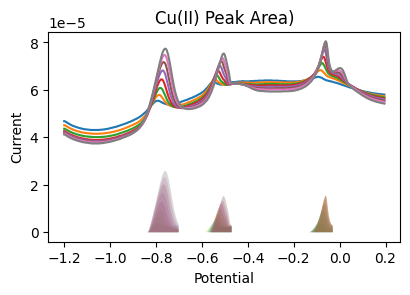

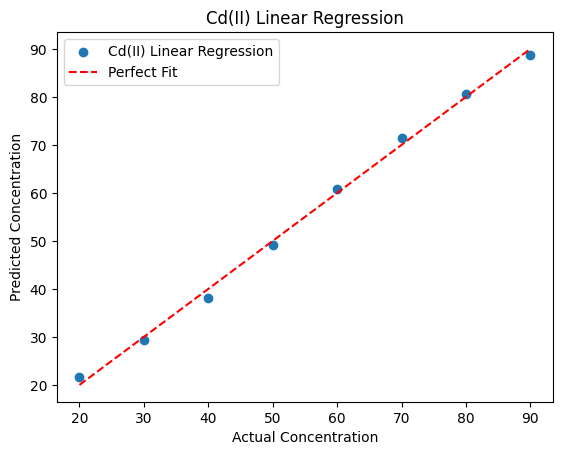

Cd(II) Linear Regression Equation: y = 3051568.1670x + -147.3571
Cd(II) R-squared score: 0.9972
Cd(II) MAE: 1.1237
Cd(II) RMSE: 1.2105


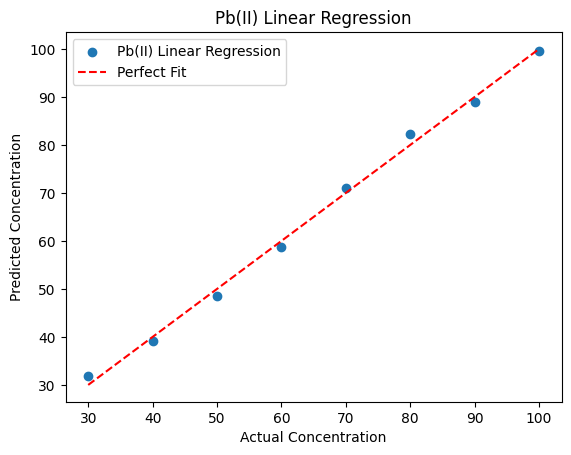

Pb(II) Linear Regression Equation: y = 5602429.9696x + -322.2680
Pb(II) R-squared score: 0.9964
Pb(II) MAE: 1.2639
Pb(II) RMSE: 1.3686


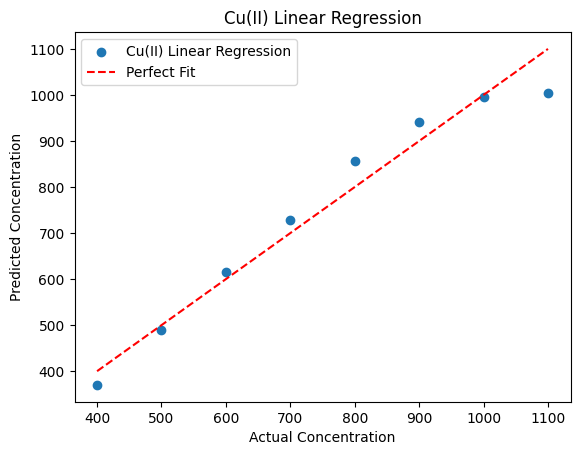

Cu(II) Linear Regression Equation: y = 42265903.6245x + -2398.2815
Cu(II) R-squared score: 0.9615
Cu(II) MAE: 35.3977
Cu(II) RMSE: 44.9295


<Figure size 640x480 with 0 Axes>

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from tabulate import tabulate
from scipy.integrate import trapz  # Import trapz for integration
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load data from CSV file
data = pd.read_csv('/content/CeO2_DPV.csv')

# Assuming the CSV file has two columns: Potential and Current
Potential = data['V'].values
I_array = I[0]  # Extract the NumPy array from the list

# Define the potential ranges and corresponding metal ions
potential_ranges = {
    'Cd(II)': get_min_max1(),
    'Pb(II)': get_min_max2(),
    'Cu(II)': get_min_max3()
}

# Define the concentrations for each metal ion
concentrations = {
    'Cd(II)': [20, 30, 40, 50, 60, 70, 80, 90],  # Concentrations for Cd(II) in uM
    'Pb(II)': [30, 40, 50, 60, 70, 80, 90, 100],  # Concentrations for Pb(II) in uM
    'Cu(II)': [400, 500, 600, 700, 800, 900, 1000, 1100]  # Concentrations for Cu(II) in uM
}

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Function to calculate peak area
def calculate_peak_area(potential_range, I_data, baseline):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    peak_areas = []
    for i in range(I_in_range.shape[1]):
        # Subtract baseline current, ensuring values are non-negative
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, i] - baseline, 0)  # Clip negative values to 0
        # Calculate the peak area using trapezoidal rule for integration
        area = trapz(I_in_range_baseline_subtracted, Potential[indices_in_range])  # Integrate within the range
        peak_areas.append(area)
    return peak_areas  # Return the calculated peak areas

def print_table(metal_ion, potential_range, concentrations):
    headers = ["Serial No.", f"{metal_ion} Peak Potential", f"{metal_ion} Current", f"{metal_ion} Peak Area", f"{metal_ion} Concentration"]
    data = []
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        data.append([j+1, max_potentials[j], max_currents[j], peak_areas[j], concentrations[j]])
    print(f"Table for {metal_ion}:")
    print(tabulate(data, headers, tablefmt="solid_table"))

# Normalize data function
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def print_normalized_table(metal_ion, potential_range, concentrations):
    headers = ["Serial No.", f"{metal_ion} Peak Potential", f"{metal_ion} Current", f"{metal_ion} Peak Area", f"{metal_ion} Concentration"]
    data = []
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        normalized_max_potential = normalize_data(max_potentials)[j]
        normalized_max_current = normalize_data(max_currents)[j]
        normalized_peak_area = normalize_data(peak_areas)[j]
        normalized_concentration = normalize_data(concentrations)[j]
        data.append([j+1, normalized_max_potential, normalized_max_current, normalized_peak_area, normalized_concentration])
    print(f"Normalised Table for {metal_ion}:")
    print(tabulate(data, headers, tablefmt="solid_table"))

# Create a list to store the features and target
features = []
target = []

for metal_ion, potential_range in potential_ranges.items():
    concentrations_for_metal = concentrations[metal_ion]  # Use the 'concentrations' dictionary here
    print_table(metal_ion, potential_range, concentrations_for_metal)
    print_normalized_table(metal_ion, potential_range, concentrations_for_metal)

    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        normalized_max_potential = normalize_data(max_potentials)[j]
        normalized_max_current = normalize_data(max_currents)[j]
        normalized_peak_area = normalize_data(peak_areas)[j]
        normalized_concentration = normalize_data(concentrations_for_metal)[j]
        # Append features and target
        features.append([normalized_max_potential, normalized_max_current, normalized_peak_area])
        target.append(normalized_concentration)

features = np.array(features)
target = np.array(target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Use Linear Regression (since you want a linear model)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Calculate RMSE and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared score: {model.score(X_test, y_test):.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Visualizations:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.subplot(2, 2, 1)  # Create a subplot grid (2 rows, 2 columns)

# Plot the original data
for i in range(I_array.shape[1]):
    plt.plot(Potential, I_array[:, i], label=f'Concentration {concentrations[list(concentrations.keys())[0]][i]}')
plt.xlabel('Potential (V)')
plt.ylabel('Current (A)')
plt.title('Original Data')

# Fill the area under the peak for each range
for metal_ion, potential_range in potential_ranges.items():
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_array[indices_in_range, :]
     # Use the more robust baseline calculation as well for plotting
    baseline_start = I_array[indices_in_range[:int(len(indices_in_range) * 0.1)], :]
    baseline_end = I_array[indices_in_range[-int(len(indices_in_range) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    for col in range(I_in_range.shape[1]):
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, col] - baseline, 0)  # Clip negative values to 0
        plt.fill_between(Potential[indices_in_range], I_in_range_baseline_subtracted, alpha=0.3, label=f'{metal_ion} Peak')  # Filling within the range
        plt.xlabel('Potential')
        plt.ylabel('Current')
        plt.title(f'{metal_ion} Peak Area)')

# Plot linear regression for each metal ion in separate plots
for metal_ion, potential_range in potential_ranges.items():
    concentrations_for_metal = concentrations[metal_ion]
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)

    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))

    peak_areas = calculate_peak_area(potential_range, I_array, baseline)
    X = np.array([max_currents]).T  # Use max_currents as the feature
    y = np.array(concentrations_for_metal)

    model_metal = LinearRegression()
    model_metal.fit(X, y)
    y_pred_metal = model_metal.predict(X)

    # Create a new figure for each metal ion
    plt.figure()
    plt.scatter(y, y_pred_metal, label=f'{metal_ion} Linear Regression')
    plt.xlabel('Actual Concentration')
    plt.ylabel('Predicted Concentration')
    plt.title(f'{metal_ion} Linear Regression')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Fit')
    plt.legend()
    plt.show() # Show each plot immediately after creating it

    # Check if coef_ and intercept_ are arrays or scalars
    if isinstance(model_metal.coef_, np.ndarray):
        coef = model_metal.coef_[0]
    else:
        coef = model_metal.coef_

    if isinstance(model_metal.intercept_, np.ndarray):
        intercept = model_metal.intercept_[0]
    else:
        intercept = model_metal.intercept_

    print(f"{metal_ion} Linear Regression Equation: y = {coef:.4f}x + {intercept:.4f}")
    print(f"{metal_ion} R-squared score: {model_metal.score(X, y):.4f}")
    print(f"{metal_ion} MAE: {mean_absolute_error(y, y_pred_metal):.4f}")
    print(f"{metal_ion} RMSE: {mean_squared_error(y, y_pred_metal, squared=False):.4f}")


plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Table for Cd(II):
+--------------+-------------------------+------------------+--------------------+------------------------+
|   Serial No. |   Cd(II) Peak Potential |   Cd(II) Current |   Cd(II) Peak Area |   Cd(II) Concentration |
+==============+=========================+==================+====================+========================+
|            1 |                  -0.798 |         5.54e-05 |        3.55549e-07 |                     20 |
+--------------+-------------------------+------------------+--------------------+------------------------+
|            2 |                  -0.786 |         5.79e-05 |        4.17304e-07 |                     30 |
+--------------+-------------------------+------------------+--------------------+------------------------+
|            3 |                  -0.783 |         6.08e-05 |        5.67581e-07 |                     40 |
+--------------+-------------------------+------------------+--------------------+------------------------+
|         

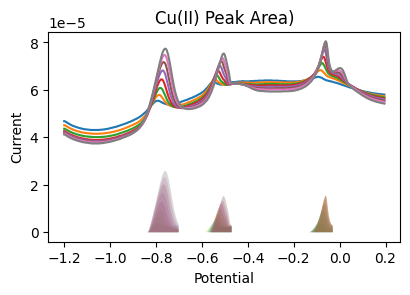

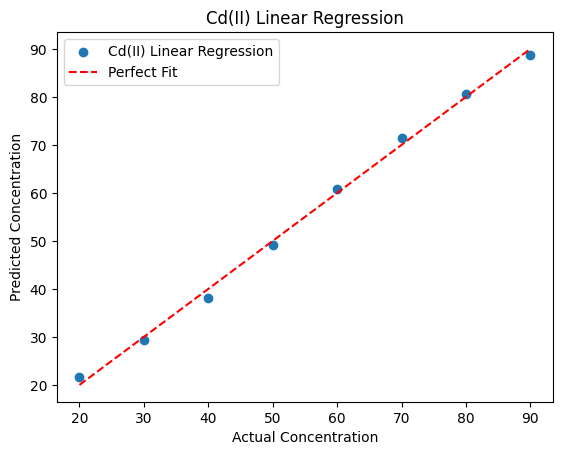

Cd(II) Linear Regression Equation: y = 3051568.1670x + -147.3571
Cd(II) R-squared score: 0.9972
Cd(II) MAE: 1.1237
Cd(II) RMSE: 1.2105


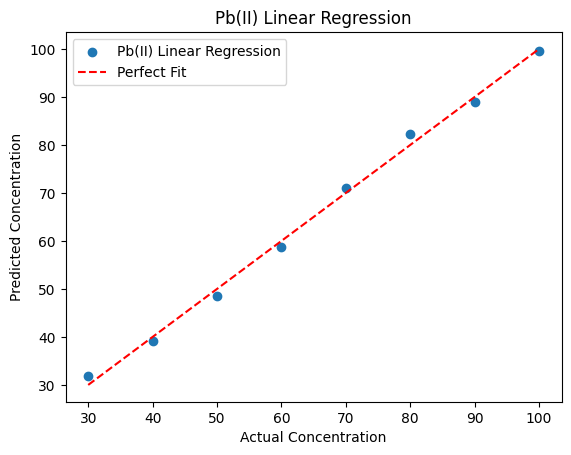

Pb(II) Linear Regression Equation: y = 5602429.9696x + -322.2680
Pb(II) R-squared score: 0.9964
Pb(II) MAE: 1.2639
Pb(II) RMSE: 1.3686


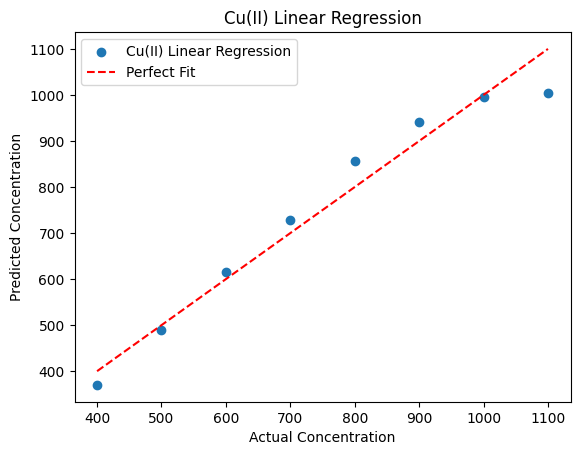

Cu(II) Linear Regression Equation: y = 42265903.6245x + -2398.2815
Cu(II) R-squared score: 0.9615
Cu(II) MAE: 35.3977
Cu(II) RMSE: 44.9295


<Figure size 640x480 with 0 Axes>

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from tabulate import tabulate
from scipy.integrate import trapz  # Import trapz for integration
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load data from CSV file
data = pd.read_csv('/content/CeO2_DPV.csv')

# Assuming the CSV file has two columns: Potential and Current
Potential = data['V'].values
I_array = I[0]  # Extract the NumPy array from the list

# Define the potential ranges and corresponding metal ions
potential_ranges = {
    'Cd(II)': get_min_max1(),
    'Pb(II)': get_min_max2(),
    'Cu(II)': get_min_max3()
}

# Define the concentrations for each metal ion
concentrations = {
    'Cd(II)': [20, 30, 40, 50, 60, 70, 80, 90],  # Concentrations for Cd(II) in uM
    'Pb(II)': [30, 40, 50, 60, 70, 80, 90, 100],  # Concentrations for Pb(II) in uM
    'Cu(II)': [400, 500, 600, 700, 800, 900, 1000, 1100]  # Concentrations for Cu(II) in uM
}

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Function to calculate peak area
def calculate_peak_area(potential_range, I_data, baseline):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    peak_areas = []
    for i in range(I_in_range.shape[1]):
        # Subtract baseline current, ensuring values are non-negative
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, i] - baseline, 0)  # Clip negative values to 0
        # Calculate the peak area using trapezoidal rule for integration
        area = trapz(I_in_range_baseline_subtracted, Potential[indices_in_range])  # Integrate within the range
        peak_areas.append(area)
    return peak_areas  # Return the calculated peak areas

def print_table(metal_ion, potential_range, concentrations):
    headers = ["Serial No.", f"{metal_ion} Peak Potential", f"{metal_ion} Current", f"{metal_ion} Peak Area", f"{metal_ion} Concentration"]
    data = []
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        data.append([j+1, max_potentials[j], max_currents[j], peak_areas[j], concentrations[j]])
    print(f"Table for {metal_ion}:")
    print(tabulate(data, headers, tablefmt="grid"))  # Use the "grid" table format

# Normalize data function
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def print_normalized_table(metal_ion, potential_range, concentrations):
    headers = ["Serial No.", f"{metal_ion} Peak Potential", f"{metal_ion} Current", f"{metal_ion} Peak Area", f"{metal_ion} Concentration"]
    data = []
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        normalized_max_potential = normalize_data(max_potentials)[j]
        normalized_max_current = normalize_data(max_currents)[j]
        normalized_peak_area = normalize_data(peak_areas)[j]
        normalized_concentration = normalize_data(concentrations)[j]
        data.append([j+1, normalized_max_potential, normalized_max_current, normalized_peak_area, normalized_concentration])
    print(f"Normalised Table for {metal_ion}:")
    print(tabulate(data, headers, tablefmt="grid"))  # Use the "grid" table format

# Create a list to store the features and target
features = []
target = []

for metal_ion, potential_range in potential_ranges.items():
    concentrations_for_metal = concentrations[metal_ion]  # Use the 'concentrations' dictionary here
    print_table(metal_ion, potential_range, concentrations_for_metal)
    print_normalized_table(metal_ion, potential_range, concentrations_for_metal)

    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        normalized_max_potential = normalize_data(max_potentials)[j]
        normalized_max_current = normalize_data(max_currents)[j]
        normalized_peak_area = normalize_data(peak_areas)[j]
        normalized_concentration = normalize_data(concentrations_for_metal)[j]
        # Append features and target
        features.append([normalized_max_potential, normalized_max_current, normalized_peak_area])
        target.append(normalized_concentration)

features = np.array(features)
target = np.array(target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Use Linear Regression (since you want a linear model)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Calculate RMSE and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared score: {model.score(X_test, y_test):.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


# Visualizations:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.subplot(2, 2, 1)  # Create a subplot grid (2 rows, 2 columns)

# Plot the original data
for i in range(I_array.shape[1]):
    plt.plot(Potential, I_array[:, i], label=f'Concentration {concentrations[list(concentrations.keys())[0]][i]}')
plt.xlabel('Potential (V)')
plt.ylabel('Current (A)')
plt.title('Original Data')

# Fill the area under the peak for each range
for metal_ion, potential_range in potential_ranges.items():
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_array[indices_in_range, :]
     # Use the more robust baseline calculation as well for plotting
    baseline_start = I_array[indices_in_range[:int(len(indices_in_range) * 0.1)], :]
    baseline_end = I_array[indices_in_range[-int(len(indices_in_range) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    for col in range(I_in_range.shape[1]):
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, col] - baseline, 0)  # Clip negative values to 0
        plt.fill_between(Potential[indices_in_range], I_in_range_baseline_subtracted, alpha=0.3, label=f'{metal_ion} Peak')  # Filling within the range
        plt.xlabel('Potential')
        plt.ylabel('Current')
        plt.title(f'{metal_ion} Peak Area)')

# Plot linear regression for each metal ion in separate plots
for metal_ion, potential_range in potential_ranges.items():
    concentrations_for_metal = concentrations[metal_ion]
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)

    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))

    peak_areas = calculate_peak_area(potential_range, I_array, baseline)
    X = np.array([max_currents]).T  # Use max_currents as the feature
    y = np.array(concentrations_for_metal)

    model_metal = LinearRegression()
    model_metal.fit(X, y)
    y_pred_metal = model_metal.predict(X)

    # Create a new figure for each metal ion
    plt.figure()
    plt.scatter(y, y_pred_metal, label=f'{metal_ion} Linear Regression')
    plt.xlabel('Actual Concentration')
    plt.ylabel('Predicted Concentration')
    plt.title(f'{metal_ion} Linear Regression')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Fit')
    plt.legend()
    plt.show() # Show each plot immediately after creating it

    # Check if coef_ and intercept_ are arrays or scalars
    if isinstance(model_metal.coef_, np.ndarray):
        coef = model_metal.coef_[0]
    else:
        coef = model_metal.coef_

    if isinstance(model_metal.intercept_, np.ndarray):
        intercept = model_metal.intercept_[0]
    else:
        intercept = model_metal.intercept_

    print(f"{metal_ion} Linear Regression Equation: y = {coef:.4f}x + {intercept:.4f}")
    print(f"{metal_ion} R-squared score: {model_metal.score(X, y):.4f}")
    print(f"{metal_ion} MAE: {mean_absolute_error(y, y_pred_metal):.4f}")
    print(f"{metal_ion} RMSE: {mean_squared_error(y, y_pred_metal, squared=False):.4f}")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Table for Cd(II):
+--------------+-------------------------+------------------+--------------------+------------------------+
|   Serial No. |   Cd(II) Peak Potential |   Cd(II) Current |   Cd(II) Peak Area |   Cd(II) Concentration |
+==============+=========================+==================+====================+========================+
|            1 |                  -0.798 |         5.54e-05 |        3.55549e-07 |                     20 |
+--------------+-------------------------+------------------+--------------------+------------------------+
|            2 |                  -0.786 |         5.79e-05 |        4.17304e-07 |                     30 |
+--------------+-------------------------+------------------+--------------------+------------------------+
|            3 |                  -0.783 |         6.08e-05 |        5.67581e-07 |                     40 |
+--------------+-------------------------+------------------+--------------------+------------------------+
|         

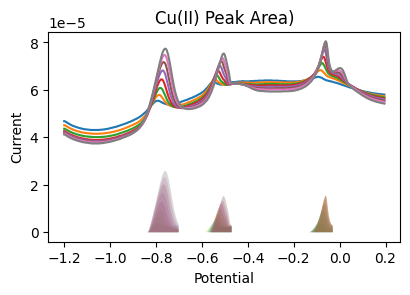

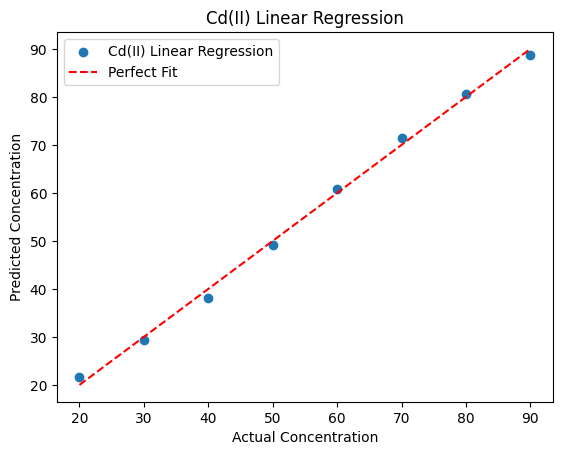

Cd(II) Linear Regression Equation: y = 3051568.1670x + -147.3571
Cd(II) R-squared score: 0.9972
Cd(II) MAE: 1.1237
Cd(II) RMSE: 1.2105


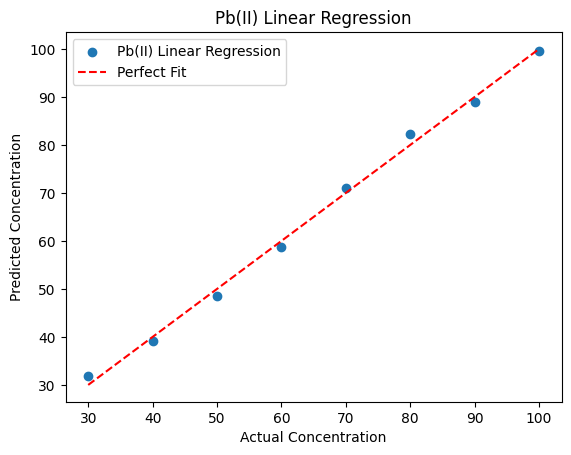

Pb(II) Linear Regression Equation: y = 5602429.9696x + -322.2680
Pb(II) R-squared score: 0.9964
Pb(II) MAE: 1.2639
Pb(II) RMSE: 1.3686


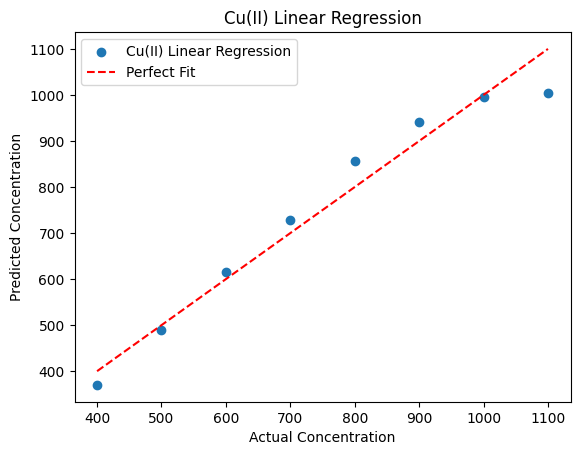

Cu(II) Linear Regression Equation: y = 42265903.6245x + -2398.2815
Cu(II) R-squared score: 0.9615
Cu(II) MAE: 35.3977
Cu(II) RMSE: 44.9295


<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from tabulate import tabulate
from scipy.integrate import trapz  # Import trapz for integration
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load data from CSV file
data = pd.read_csv('/content/CeO2_DPV.csv')

# Assuming the CSV file has two columns: Potential and Current
Potential = data['V'].values
I_array = I[0]  # Extract the NumPy array from the list

# Define the potential ranges and corresponding metal ions
potential_ranges = {
    'Cd(II)': get_min_max1(),
    'Pb(II)': get_min_max2(),
    'Cu(II)': get_min_max3()
}

# Define the concentrations for each metal ion
concentrations = {
    'Cd(II)': [20, 30, 40, 50, 60, 70, 80, 90],  # Concentrations for Cd(II) in uM
    'Pb(II)': [30, 40, 50, 60, 70, 80, 90, 100],  # Concentrations for Pb(II) in uM
    'Cu(II)': [400, 500, 600, 700, 800, 900, 1000, 1100]  # Concentrations for Cu(II) in uM
}

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Function to calculate peak area
def calculate_peak_area(potential_range, I_data, baseline):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    peak_areas = []
    for i in range(I_in_range.shape[1]):
        # Subtract baseline current, ensuring values are non-negative
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, i] - baseline, 0)  # Clip negative values to 0
        # Calculate the peak area using trapezoidal rule for integration
        area = trapz(I_in_range_baseline_subtracted, Potential[indices_in_range])  # Integrate within the range
        peak_areas.append(area)
    return peak_areas  # Return the calculated peak areas

def print_table(metal_ion, potential_range, concentrations):
    headers = ["Serial No.", f"{metal_ion} Peak Potential", f"{metal_ion} Current", f"{metal_ion} Peak Area", f"{metal_ion} Concentration"]
    data = []
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        data.append([j+1, max_potentials[j], max_currents[j], peak_areas[j], concentrations[j]])
    print(f"Table for {metal_ion}:")
    print(tabulate(data, headers, tablefmt="grid"))  # Use the "grid" table format

# Normalize data function
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def print_normalized_table(metal_ion, potential_range, concentrations):
    headers = ["Serial No.", f"{metal_ion} Peak Potential", f"{metal_ion} Current", f"{metal_ion} Peak Area", f"{metal_ion} Concentration"]
    data = []
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        normalized_max_potential = normalize_data(max_potentials)[j]
        normalized_max_current = normalize_data(max_currents)[j]
        normalized_peak_area = normalize_data(peak_areas)[j]
        normalized_concentration = normalize_data(concentrations)[j]
        data.append([j+1, normalized_max_potential, normalized_max_current, normalized_peak_area, normalized_concentration])
    print(f"Normalised Table for {metal_ion}:")
    print(tabulate(data, headers, tablefmt="grid"))  # Use the "grid" table format

# Create a list to store the features and target
features = []
target = []

for metal_ion, potential_range in potential_ranges.items():
    concentrations_for_metal = concentrations[metal_ion]  # Use the 'concentrations' dictionary here
    print_table(metal_ion, potential_range, concentrations_for_metal)
    print_normalized_table(metal_ion, potential_range, concentrations_for_metal)

    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        normalized_max_potential = normalize_data(max_potentials)[j]
        normalized_max_current = normalize_data(max_currents)[j]
        normalized_peak_area = normalize_data(peak_areas)[j]
        normalized_concentration = normalize_data(concentrations_for_metal)[j]
        # Append features and target
        features.append([normalized_max_potential, normalized_max_current, normalized_peak_area])
        target.append(normalized_concentration)

features = np.array(features)
target = np.array(target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Use Linear Regression (since you want a linear model)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Calculate RMSE and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared score: {model.score(X_test, y_test):.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


# Visualizations:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.subplot(2, 2, 1)  # Create a subplot grid (2 rows, 2 columns)

# Plot the original data
for i in range(I_array.shape[1]):
    plt.plot(Potential, I_array[:, i], label=f'Concentration {concentrations[list(concentrations.keys())[0]][i]}')
plt.xlabel('Potential (V)')
plt.ylabel('Current (A)')
plt.title('Original Data')

# Fill the area under the peak for each range
for metal_ion, potential_range in potential_ranges.items():
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_array[indices_in_range, :]
     # Use the more robust baseline calculation as well for plotting
    baseline_start = I_array[indices_in_range[:int(len(indices_in_range) * 0.1)], :]
    baseline_end = I_array[indices_in_range[-int(len(indices_in_range) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    for col in range(I_in_range.shape[1]):
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, col] - baseline, 0)  # Clip negative values to 0
        plt.fill_between(Potential[indices_in_range], I_in_range_baseline_subtracted, alpha=0.3, label=f'{metal_ion} Peak')  # Filling within the range
        plt.xlabel('Potential')
        plt.ylabel('Current')
        plt.title(f'{metal_ion} Peak Area)')

# Plot linear regression for each metal ion in separate plots
for metal_ion, potential_range in potential_ranges.items():
    concentrations_for_metal = concentrations[metal_ion]
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)

    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))

    peak_areas = calculate_peak_area(potential_range, I_array, baseline)
    X = np.array([max_currents]).T  # Use max_currents as the feature
    y = np.array(concentrations_for_metal)

    model_metal = LinearRegression()
    model_metal.fit(X, y)
    y_pred_metal = model_metal.predict(X)

    # Create a new figure for each metal ion
    plt.figure()
    plt.scatter(y, y_pred_metal, label=f'{metal_ion} Linear Regression')
    plt.xlabel('Actual Concentration')
    plt.ylabel('Predicted Concentration')
    plt.title(f'{metal_ion} Linear Regression')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Fit')
    plt.legend()
    plt.show() # Show each plot immediately after creating it

    # Check if coef_ and intercept_ are arrays or scalars
    if isinstance(model_metal.coef_, np.ndarray):
        coef = model_metal.coef_[0]
    else:
        coef = model_metal.coef_

    if isinstance(model_metal.intercept_, np.ndarray):
        intercept = model_metal.intercept_[0]
    else:
        intercept = model_metal.intercept_

    print(f"{metal_ion} Linear Regression Equation: y = {coef:.4f}x + {intercept:.4f}")
    print(f"{metal_ion} R-squared score: {model_metal.score(X, y):.4f}")
    print(f"{metal_ion} MAE: {mean_absolute_error(y, y_pred_metal):.4f}")
    print(f"{metal_ion} RMSE: {mean_squared_error(y, y_pred_metal, squared=False):.4f}")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Table for Cd(II):
+--------------+-------------------------+------------------+--------------------+------------------------+
|   Serial No. |   Cd(II) Peak Potential |   Cd(II) Current |   Cd(II) Peak Area |   Cd(II) Concentration |
+==============+=========================+==================+====================+========================+
|            1 |                  -0.798 |         5.54e-05 |        3.55549e-07 |                     20 |
+--------------+-------------------------+------------------+--------------------+------------------------+
|            2 |                  -0.786 |         5.79e-05 |        4.17304e-07 |                     30 |
+--------------+-------------------------+------------------+--------------------+------------------------+
|            3 |                  -0.783 |         6.08e-05 |        5.67581e-07 |                     40 |
+--------------+-------------------------+------------------+--------------------+------------------------+
|         

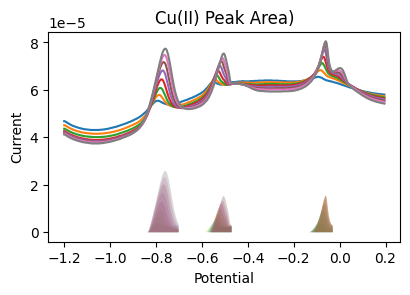

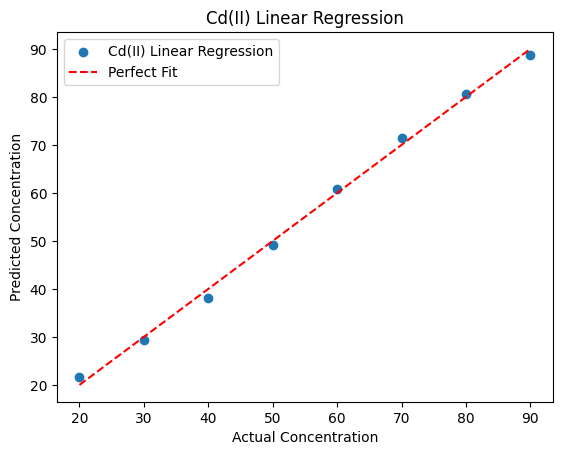

Cd(II) Linear Regression Equation: y = 3051568.1670x + -147.3571
Cd(II) R-squared score: 0.9972
Cd(II) MAE: 1.1237
Cd(II) RMSE: 1.2105


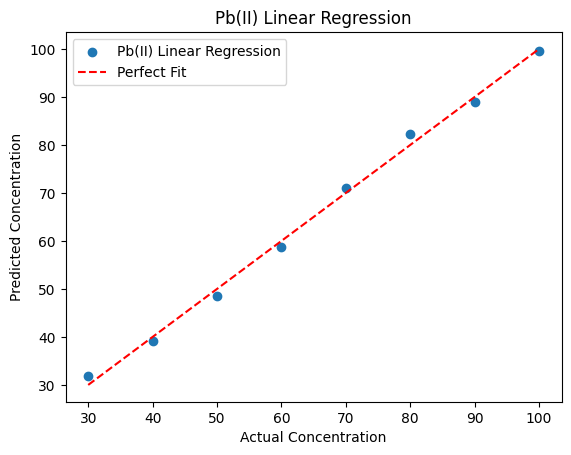

Pb(II) Linear Regression Equation: y = 5602429.9696x + -322.2680
Pb(II) R-squared score: 0.9964
Pb(II) MAE: 1.2639
Pb(II) RMSE: 1.3686


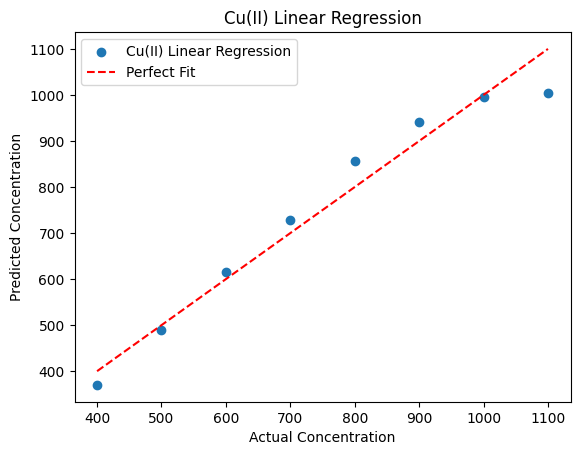

Cu(II) Linear Regression Equation: y = 42265903.6245x + -2398.2815
Cu(II) R-squared score: 0.9615
Cu(II) MAE: 35.3977
Cu(II) RMSE: 44.9295


<Figure size 640x480 with 0 Axes>

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from tabulate import tabulate
from scipy.integrate import trapz  # Import trapz for integration
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load data from CSV file
data = pd.read_csv('/content/CeO2_DPV.csv')

# Assuming the CSV file has two columns: Potential and Current
Potential = data['V'].values
I_array = I[0]  # Extract the NumPy array from the list

# Define the potential ranges and corresponding metal ions
potential_ranges = {
    'Cd(II)': get_min_max1(),
    'Pb(II)': get_min_max2(),
    'Cu(II)': get_min_max3()
}

# Define the concentrations for each metal ion
concentrations = {
    'Cd(II)': [20, 30, 40, 50, 60, 70, 80, 90],  # Concentrations for Cd(II) in uM
    'Pb(II)': [30, 40, 50, 60, 70, 80, 90, 100],  # Concentrations for Pb(II) in uM
    'Cu(II)': [400, 500, 600, 700, 800, 900, 1000, 1100]  # Concentrations for Cu(II) in uM
}

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Function to calculate peak area
def calculate_peak_area(potential_range, I_data, baseline):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    peak_areas = []
    for i in range(I_in_range.shape[1]):
        # Subtract baseline current, ensuring values are non-negative
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, i] - baseline, 0)  # Clip negative values to 0
        # Calculate the peak area using trapezoidal rule for integration
        area = trapz(I_in_range_baseline_subtracted, Potential[indices_in_range])  # Integrate within the range
        peak_areas.append(area)
    return peak_areas  # Return the calculated peak areas

def print_table(metal_ion, potential_range, concentrations):
    headers = ["Serial No.", f"{metal_ion} Peak Potential", f"{metal_ion} Current", f"{metal_ion} Peak Area", f"{metal_ion} Concentration"]
    data = []
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        data.append([j+1, max_potentials[j], max_currents[j], peak_areas[j], concentrations[j]])
    print(f"Table for {metal_ion}:")
    print(tabulate(data, headers, tablefmt="grid"))  # Use the "grid" table format

# Normalize data function
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def print_normalized_table(metal_ion, potential_range, concentrations):
    headers = ["Serial No.", f"{metal_ion} Peak Potential", f"{metal_ion} Current", f"{metal_ion} Peak Area", f"{metal_ion} Concentration"]
    data = []
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        normalized_max_potential = normalize_data(max_potentials)[j]
        normalized_max_current = normalize_data(max_currents)[j]
        normalized_peak_area = normalize_data(peak_areas)[j]
        normalized_concentration = normalize_data(concentrations)[j]
        data.append([j+1, normalized_max_potential, normalized_max_current, normalized_peak_area, normalized_concentration])
    print(f"Normalised Table for {metal_ion}:")
    print(tabulate(data, headers, tablefmt="grid"))  # Use the "grid" table format

# Create a list to store the features and target
features = []
target = []

for metal_ion, potential_range in potential_ranges.items():
    concentrations_for_metal = concentrations[metal_ion]  # Use the 'concentrations' dictionary here
    print_table(metal_ion, potential_range, concentrations_for_metal)
    print_normalized_table(metal_ion, potential_range, concentrations_for_metal)

    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        normalized_max_potential = normalize_data(max_potentials)[j]
        normalized_max_current = normalize_data(max_currents)[j]
        normalized_peak_area = normalize_data(peak_areas)[j]
        normalized_concentration = normalize_data(concentrations_for_metal)[j]
        # Append features and target
        features.append([normalized_max_potential, normalized_max_current, normalized_peak_area])
        target.append(normalized_concentration)

features = np.array(features)
target = np.array(target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Convert y_train to a list of lists where each inner list represents a row
y_train_list = [[val] for val in y_train]
tabulate(y_train_list, headers=['Concentration_tr'])
# Convert y_test to a list of lists where each inner list represents a row
y_test_list = [[val] for val in y_test]
tabulate(y_test_list, headers=['Concentration_ts'])

# Use Linear Regression (since you want a linear model)
model = LinearRegression()
model.fit(X_train, y_train)


# Evaluate the model
y_pred = model.predict(X_test)

# Calculate RMSE and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared score: {model.score(X_test, y_test):.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


# Visualizations:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.subplot(2, 2, 1)  # Create a subplot grid (2 rows, 2 columns)

# Plot the original data
for i in range(I_array.shape[1]):
    plt.plot(Potential, I_array[:, i], label=f'Concentration {concentrations[list(concentrations.keys())[0]][i]}')
plt.xlabel('Potential (V)')
plt.ylabel('Current (A)')
plt.title('Original Data')

# Fill the area under the peak for each range
for metal_ion, potential_range in potential_ranges.items():
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_array[indices_in_range, :]
     # Use the more robust baseline calculation as well for plotting
    baseline_start = I_array[indices_in_range[:int(len(indices_in_range) * 0.1)], :]
    baseline_end = I_array[indices_in_range[-int(len(indices_in_range) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    for col in range(I_in_range.shape[1]):
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, col] - baseline, 0)  # Clip negative values to 0
        plt.fill_between(Potential[indices_in_range], I_in_range_baseline_subtracted, alpha=0.3, label=f'{metal_ion} Peak')  # Filling within the range
        plt.xlabel('Potential')
        plt.ylabel('Current')
        plt.title(f'{metal_ion} Peak Area)')

# Plot linear regression for each metal ion in separate plots
for metal_ion, potential_range in potential_ranges.items():
    concentrations_for_metal = concentrations[metal_ion]
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)

    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))

    peak_areas = calculate_peak_area(potential_range, I_array, baseline)
    X = np.array([max_currents]).T  # Use max_currents as the feature
    y = np.array(concentrations_for_metal)

    model_metal = LinearRegression()
    model_metal.fit(X, y)
    y_pred_metal = model_metal.predict(X)

    # Create a new figure for each metal ion
    plt.figure()
    plt.scatter(y, y_pred_metal, label=f'{metal_ion} Linear Regression')
    plt.xlabel('Actual Concentration')
    plt.ylabel('Predicted Concentration')
    plt.title(f'{metal_ion} Linear Regression')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Fit')
    plt.legend()
    plt.show() # Show each plot immediately after creating it

    # Check if coef_ and intercept_ are arrays or scalars
    if isinstance(model_metal.coef_, np.ndarray):
        coef = model_metal.coef_[0]
    else:
        coef = model_metal.coef_

    if isinstance(model_metal.intercept_, np.ndarray):
        intercept = model_metal.intercept_[0]
    else:
        intercept = model_metal.intercept_

    print(f"{metal_ion} Linear Regression Equation: y = {coef:.4f}x + {intercept:.4f}")
    print(f"{metal_ion} R-squared score: {model_metal.score(X, y):.4f}")
    print(f"{metal_ion} MAE: {mean_absolute_error(y, y_pred_metal):.4f}")
    print(f"{metal_ion} RMSE: {mean_squared_error(y, y_pred_metal, squared=False):.4f}")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Table for Cd(II):
+--------------+-------------------------+------------------+--------------------+------------------------+
|   Serial No. |   Cd(II) Peak Potential |   Cd(II) Current |   Cd(II) Peak Area |   Cd(II) Concentration |
+==============+=========================+==================+====================+========================+
|            1 |                  -0.798 |         5.54e-05 |        3.55549e-07 |                     20 |
+--------------+-------------------------+------------------+--------------------+------------------------+
|            2 |                  -0.786 |         5.79e-05 |        4.17304e-07 |                     30 |
+--------------+-------------------------+------------------+--------------------+------------------------+
|            3 |                  -0.783 |         6.08e-05 |        5.67581e-07 |                     40 |
+--------------+-------------------------+------------------+--------------------+------------------------+
|         

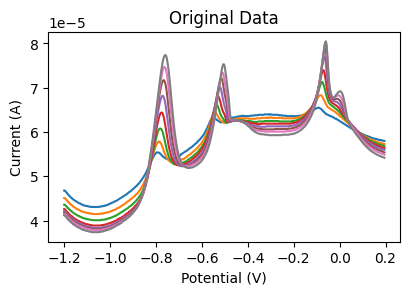

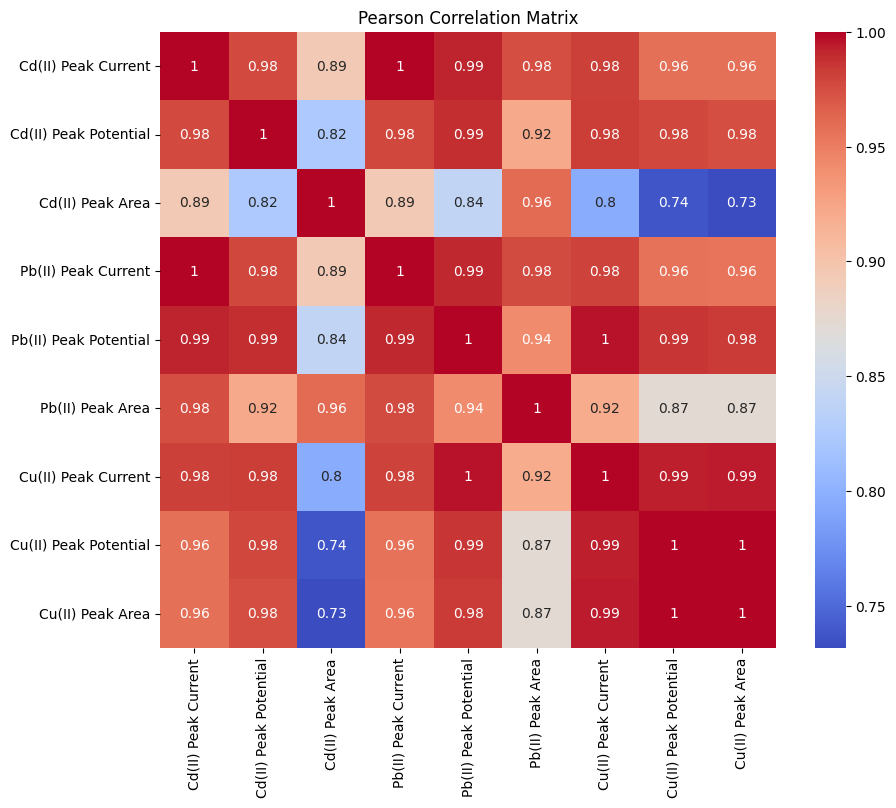

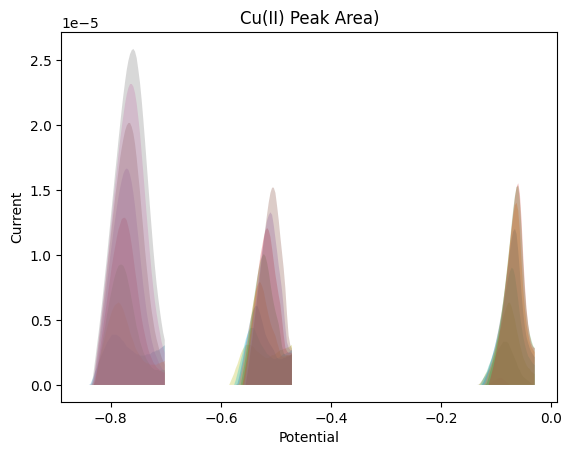

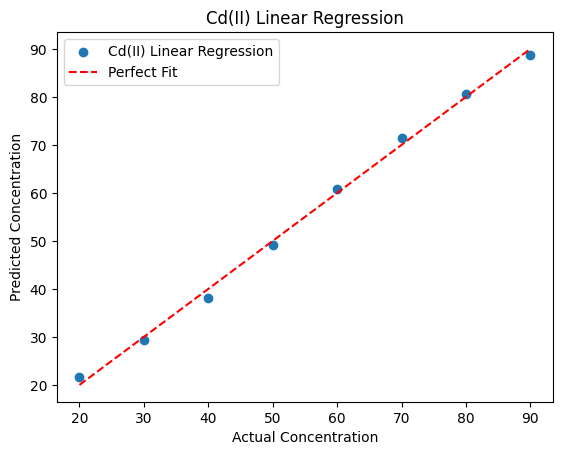

Cd(II) Linear Regression Equation: y = 3051568.1670x + -147.3571
Cd(II) R-squared score: 0.9972
Cd(II) MAE: 1.1237
Cd(II) RMSE: 1.2105


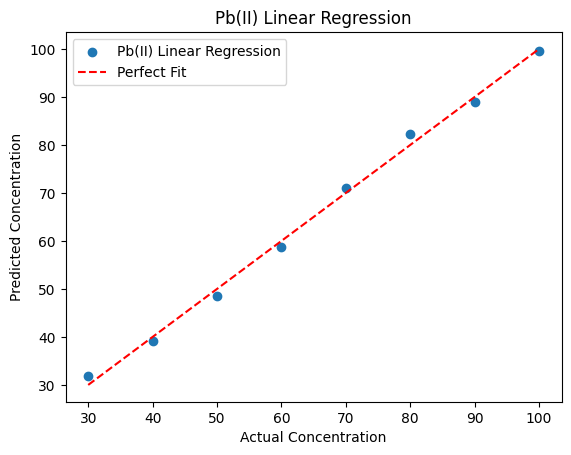

Pb(II) Linear Regression Equation: y = 5602429.9696x + -322.2680
Pb(II) R-squared score: 0.9964
Pb(II) MAE: 1.2639
Pb(II) RMSE: 1.3686


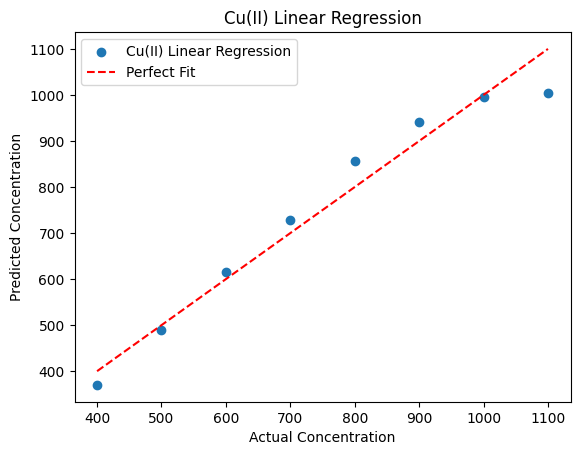

Cu(II) Linear Regression Equation: y = 42265903.6245x + -2398.2815
Cu(II) R-squared score: 0.9615
Cu(II) MAE: 35.3977
Cu(II) RMSE: 44.9295


<Figure size 640x480 with 0 Axes>

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from tabulate import tabulate
from scipy.integrate import trapz  # Import trapz for integration
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load data from CSV file
data = pd.read_csv('/content/CeO2_DPV.csv')

# Assuming the CSV file has two columns: Potential and Current
Potential = data['V'].values
I_array = I[0]  # Extract the NumPy array from the list

# Define the potential ranges and corresponding metal ions
potential_ranges = {
    'Cd(II)': get_min_max1(),
    'Pb(II)': get_min_max2(),
    'Cu(II)': get_min_max3()
}

# Define the concentrations for each metal ion
concentrations = {
    'Cd(II)': [20, 30, 40, 50, 60, 70, 80, 90],  # Concentrations for Cd(II) in uM
    'Pb(II)': [30, 40, 50, 60, 70, 80, 90, 100],  # Concentrations for Pb(II) in uM
    'Cu(II)': [400, 500, 600, 700, 800, 900, 1000, 1100]  # Concentrations for Cu(II) in uM
}

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Function to calculate peak area
def calculate_peak_area(potential_range, I_data, baseline):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    peak_areas = []
    for i in range(I_in_range.shape[1]):
        # Subtract baseline current, ensuring values are non-negative
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, i] - baseline, 0)  # Clip negative values to 0
        # Calculate the peak area using trapezoidal rule for integration
        area = trapz(I_in_range_baseline_subtracted, Potential[indices_in_range])  # Integrate within the range
        peak_areas.append(area)
    return peak_areas  # Return the calculated peak areas

def print_table(metal_ion, potential_range, concentrations):
    headers = ["Serial No.", f"{metal_ion} Peak Potential", f"{metal_ion} Current", f"{metal_ion} Peak Area", f"{metal_ion} Concentration"]
    data = []
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        data.append([j+1, max_potentials[j], max_currents[j], peak_areas[j], concentrations[j]])
    print(f"Table for {metal_ion}:")
    print(tabulate(data, headers, tablefmt="grid"))  # Use the "grid" table format

# Normalize data function
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def print_normalized_table(metal_ion, potential_range, concentrations):
    headers = ["Serial No.", f"{metal_ion} Peak Potential", f"{metal_ion} Current", f"{metal_ion} Peak Area", f"{metal_ion} Concentration"]
    data = []
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        normalized_max_potential = normalize_data(max_potentials)[j]
        normalized_max_current = normalize_data(max_currents)[j]
        normalized_peak_area = normalize_data(peak_areas)[j]
        normalized_concentration = normalize_data(concentrations)[j]
        data.append([j+1, normalized_max_potential, normalized_max_current, normalized_peak_area, normalized_concentration])
    print(f"Normalised Table for {metal_ion}:")
    print(tabulate(data, headers, tablefmt="grid"))  # Use the "grid" table format

# Create a list to store the features and target
features = []
target = []

for metal_ion, potential_range in potential_ranges.items():
    concentrations_for_metal = concentrations[metal_ion]  # Use the 'concentrations' dictionary here
    print_table(metal_ion, potential_range, concentrations_for_metal)
    print_normalized_table(metal_ion, potential_range, concentrations_for_metal)

    max_potentials, max_currents = find_max_in_range(potential_range, I_array)
    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    # More robust baseline calculation:
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
    for j in range(I_array.shape[1]):
        normalized_max_potential = normalize_data(max_potentials)[j]
        normalized_max_current = normalize_data(max_currents)[j]
        normalized_peak_area = normalize_data(peak_areas)[j]
        normalized_concentration = normalize_data(concentrations_for_metal)[j]
        # Append features and target
        features.append([normalized_max_potential, normalized_max_current, normalized_peak_area])
        target.append(normalized_concentration)

features = np.array(features)
target = np.array(target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Convert y_train to a list of lists where each inner list represents a row
y_train_list = [[val] for val in y_train]
tabulate(y_train_list, headers=['Concentration_tr'])
# Convert y_test to a list of lists where each inner list represents a row
y_test_list = [[val] for val in y_test]
tabulate(y_test_list, headers=['Concentration_ts'])

# Use Linear Regression (since you want a linear model)
model = LinearRegression()
model.fit(X_train, y_train)


# Evaluate the model
y_pred = model.predict(X_test)

# Calculate RMSE and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared score: {model.score(X_test, y_test):.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


# Visualizations:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.subplot(2, 2, 1)  # Create a subplot grid (2 rows, 2 columns)

# Plot the original data
for i in range(I_array.shape[1]):
    plt.plot(Potential, I_array[:, i], label=f'Concentration {concentrations[list(concentrations.keys())[0]][i]}')
plt.xlabel('Potential (V)')
plt.ylabel('Current (A)')
plt.title('Original Data')

# Plot for pearson correlation matrix
max_potentials_Cd, max_currents_Cd = find_max_in_range(potential_ranges['Cd(II)'], I_array)
peak_areas_Cd = calculate_peak_area(potential_ranges['Cd(II)'], I_array, baseline)  # Calculate peak areas for Cd(II)

max_potentials_Pb, max_currents_Pb = find_max_in_range(potential_ranges['Pb(II)'], I_array)
peak_areas_Pb = calculate_peak_area(potential_ranges['Pb(II)'], I_array, baseline)  # Calculate peak areas for Pb(II)

max_potentials_Cu, max_currents_Cu = find_max_in_range(potential_ranges['Cu(II)'], I_array)
peak_areas_Cu = calculate_peak_area(potential_ranges['Cu(II)'], I_array, baseline)  # Calculate peak areas for Cu(II)

# Create a DataFrame to store the features
features_df = pd.DataFrame({
    'Cd(II) Peak Current': max_currents_Cd,
    'Cd(II) Peak Potential': max_potentials_Cd,
    'Cd(II) Peak Area': peak_areas_Cd,
    'Pb(II) Peak Current': max_currents_Pb,
    'Pb(II) Peak Potential': max_potentials_Pb,
    'Pb(II) Peak Area': peak_areas_Pb,
    'Cu(II) Peak Current': max_currents_Cu,
    'Cu(II) Peak Potential': max_potentials_Cu,
    'Cu(II) Peak Area': peak_areas_Cu
})
# Calculate the Pearson correlation matrix
corr_matrix = features_df.corr(method='pearson')

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Pearson Correlation Matrix')
plt.show()

# Fill the area under the peak for each range
for metal_ion, potential_range in potential_ranges.items():
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_array[indices_in_range, :]
     # Use the more robust baseline calculation as well for plotting
    baseline_start = I_array[indices_in_range[:int(len(indices_in_range) * 0.1)], :]
    baseline_end = I_array[indices_in_range[-int(len(indices_in_range) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    for col in range(I_in_range.shape[1]):
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, col] - baseline, 0)  # Clip negative values to 0
        plt.fill_between(Potential[indices_in_range], I_in_range_baseline_subtracted, alpha=0.3, label=f'{metal_ion} Peak')  # Filling within the range
        plt.xlabel('Potential')
        plt.ylabel('Current')
        plt.title(f'{metal_ion} Peak Area)')

# Plot linear regression for each metal ion in separate plots
for metal_ion, potential_range in potential_ranges.items():
    concentrations_for_metal = concentrations[metal_ion]
    max_potentials, max_currents = find_max_in_range(potential_range, I_array)

    # Calculate baseline current for the specific range
    min_potential, max_potential = potential_range
    baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
    baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))

    peak_areas = calculate_peak_area(potential_range, I_array, baseline)
    X = np.array([max_currents]).T  # Use max_currents as the feature
    y = np.array(concentrations_for_metal)

    model_metal = LinearRegression()
    model_metal.fit(X, y)
    y_pred_metal = model_metal.predict(X)

    # Create a new figure for each metal ion
    plt.figure()
    plt.scatter(y, y_pred_metal, label=f'{metal_ion} Linear Regression')
    plt.xlabel('Actual Concentration')
    plt.ylabel('Predicted Concentration')
    plt.title(f'{metal_ion} Linear Regression')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Fit')
    plt.legend()
    plt.show() # Show each plot immediately after creating it

    # Check if coef_ and intercept_ are arrays or scalars
    if isinstance(model_metal.coef_, np.ndarray):
        coef = model_metal.coef_[0]
    else:
        coef = model_metal.coef_

    if isinstance(model_metal.intercept_, np.ndarray):
        intercept = model_metal.intercept_[0]
    else:
        intercept = model_metal.intercept_

    print(f"{metal_ion} Linear Regression Equation: y = {coef:.4f}x + {intercept:.4f}")
    print(f"{metal_ion} R-squared score: {model_metal.score(X, y):.4f}")
    print(f"{metal_ion} MAE: {mean_absolute_error(y, y_pred_metal):.4f}")
    print(f"{metal_ion} RMSE: {mean_squared_error(y, y_pred_metal, squared=False):.4f}")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

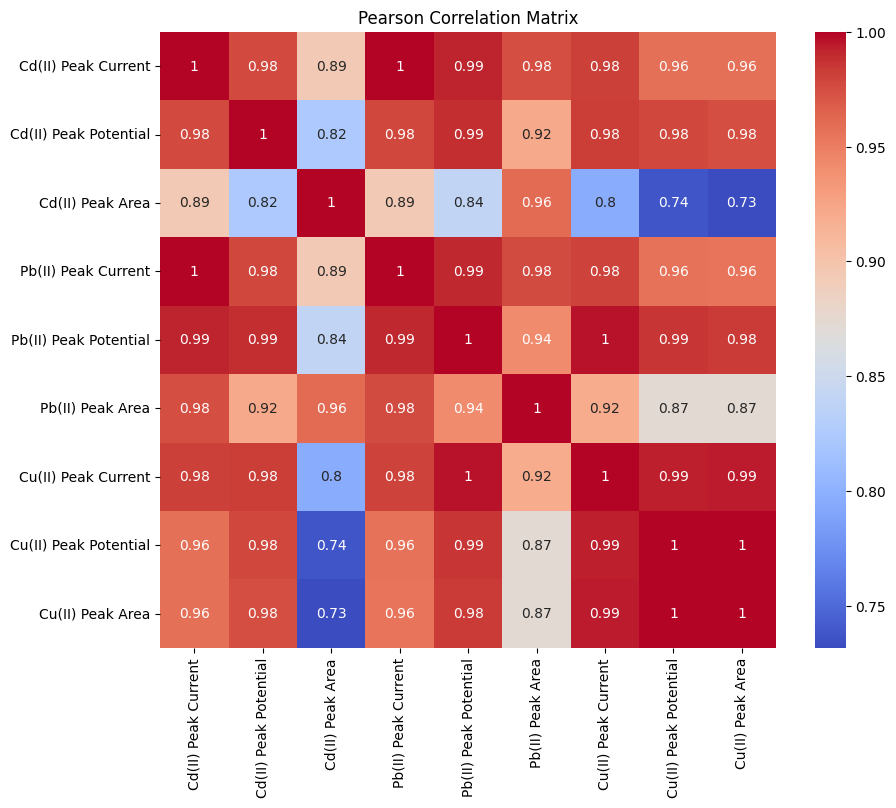

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate peak values for each metal ion
max_potentials_Cd, max_currents_Cd = find_max_in_range(potential_ranges['Cd(II)'], I_array)
peak_areas_Cd = calculate_peak_area(potential_ranges['Cd(II)'], I_array, baseline)  # Calculate peak areas for Cd(II)

max_potentials_Pb, max_currents_Pb = find_max_in_range(potential_ranges['Pb(II)'], I_array)
peak_areas_Pb = calculate_peak_area(potential_ranges['Pb(II)'], I_array, baseline)  # Calculate peak areas for Pb(II)

max_potentials_Cu, max_currents_Cu = find_max_in_range(potential_ranges['Cu(II)'], I_array)
peak_areas_Cu = calculate_peak_area(potential_ranges['Cu(II)'], I_array, baseline)  # Calculate peak areas for Cu(II)

# Create a DataFrame to store the features
features_df = pd.DataFrame({
    'Cd(II) Peak Current': max_currents_Cd,
    'Cd(II) Peak Potential': max_potentials_Cd,
    'Cd(II) Peak Area': peak_areas_Cd,
    'Pb(II) Peak Current': max_currents_Pb,
    'Pb(II) Peak Potential': max_potentials_Pb,
    'Pb(II) Peak Area': peak_areas_Pb,
    'Cu(II) Peak Current': max_currents_Cu,
    'Cu(II) Peak Potential': max_potentials_Cu,
    'Cu(II) Peak Area': peak_areas_Cu
})
# Calculate the Pearson correlation matrix
corr_matrix = features_df.corr(method='pearson')

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Pearson Correlation Matrix')
plt.show()

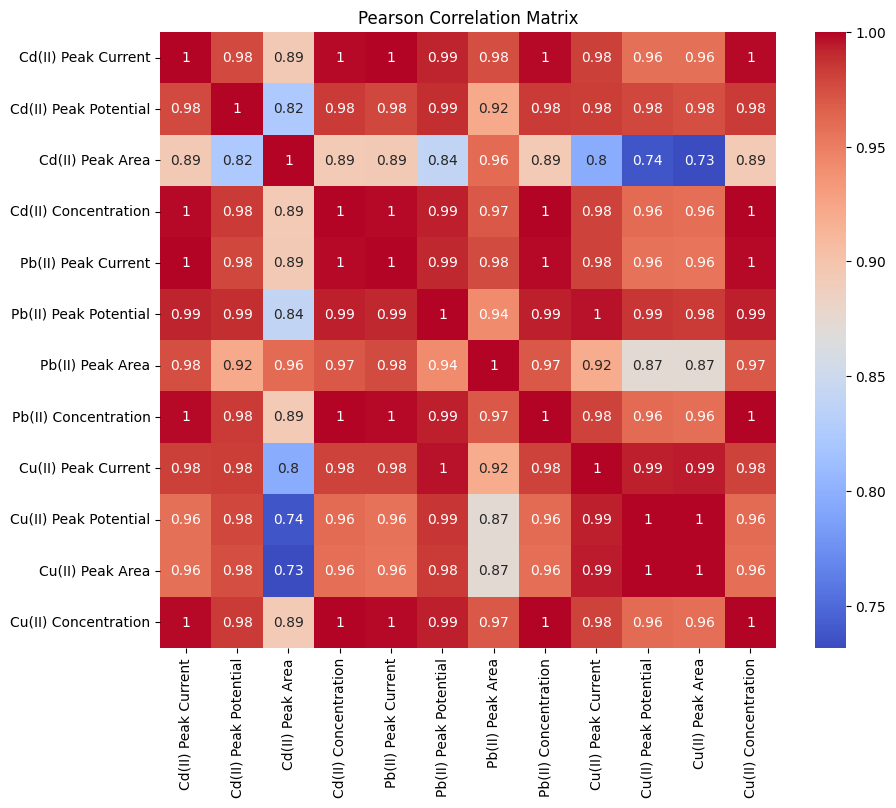

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate peak values for each metal ion
max_potentials_Cd, max_currents_Cd = find_max_in_range(potential_ranges['Cd(II)'], I_array)
peak_areas_Cd = calculate_peak_area(potential_ranges['Cd(II)'], I_array, baseline)  # Calculate peak areas for Cd(II)

max_potentials_Pb, max_currents_Pb = find_max_in_range(potential_ranges['Pb(II)'], I_array)
peak_areas_Pb = calculate_peak_area(potential_ranges['Pb(II)'], I_array, baseline)  # Calculate peak areas for Pb(II)

max_potentials_Cu, max_currents_Cu = find_max_in_range(potential_ranges['Cu(II)'], I_array)
peak_areas_Cu = calculate_peak_area(potential_ranges['Cu(II)'], I_array, baseline)  # Calculate peak areas for Cu(II)

# Assuming 'concentrations' is a dictionary like this:
concentrations = {
    'Cd(II)': [20, 30, 40, 50, 60, 70, 80, 90],
    'Pb(II)': [30, 40, 50, 60, 70, 80, 90, 100],
    'Cu(II)': [400, 500, 600, 700, 800, 900, 1000, 1100]
}

# Create a DataFrame to store the features
features_df = pd.DataFrame({
    'Cd(II) Peak Current': max_currents_Cd,
    'Cd(II) Peak Potential': max_potentials_Cd,
    'Cd(II) Peak Area': peak_areas_Cd,
    'Cd(II) Concentration': concentrations['Cd(II)'],  # Add concentration for Cd(II)
    'Pb(II) Peak Current': max_currents_Pb,
    'Pb(II) Peak Potential': max_potentials_Pb,
    'Pb(II) Peak Area': peak_areas_Pb,
    'Pb(II) Concentration': concentrations['Pb(II)'],  # Add concentration for Pb(II)
    'Cu(II) Peak Current': max_currents_Cu,
    'Cu(II) Peak Potential': max_potentials_Cu,
    'Cu(II) Peak Area': peak_areas_Cu,
    'Cu(II) Concentration': concentrations['Cu(II)']   # Add concentration for Cu(II)
})

# Calculate the Pearson correlation matrix
corr_matrix = features_df.corr(method='pearson')

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Pearson Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load and Preprocess Data ---
def load_and_preprocess(csv_file):
    data = pd.read_csv(csv_file)

    # Assuming the CSV has columns: 'Potential', 'Current', 'Metal Ion', 'Concentration'
    Potential = data['Potential'].values
    I_array = data['Current'].values.reshape(-1, 1)  # Reshape to 2D array for consistency
    metal_ions = data['Metal Ion'].values
    concentrations = data['Concentration'].values

    # Define potential ranges (you might need to adjust these based on your data)
    potential_ranges = {
        'Cd(II)': (-1.0, -0.8),
        'Pb(II)': (-0.7, -0.5),
        'Cu(II)': (-0.4, -0.2)
    }

    # Calculate features (peak current, potential, area) for each sample
    features = []
    for i in range(len(metal_ions)):
        metal_ion = metal_ions[i]
        potential_range = potential_ranges[metal_ion]
        max_potential, max_current = find_max_in_range(potential_range, I_array[i].reshape(1, -1))  # Pass single sample
        peak_area = calculate_peak_area(potential_range, I_array[i].reshape(1, -1), baseline)  # Calculate for single sample
        features.append([max_current[0], max_potential[0], peak_area[0]])

    features = np.array(features)
    return features, concentrations, metal_ions

# --- Train the Model ---
def train_model(features, concentrations):
    X_train, X_test, y_train, y_test = train_test_split(features, concentrations, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    return model, scaler

# --- Predict and Analyze ---
def predict_and_analyze(model, scaler, features, metal_ions, actual_concentrations):
    features_scaled = scaler.transform(features)
    predicted_concentrations = model.predict(features_scaled)

    results_df = pd.DataFrame({
        'Metal Ion': metal_ions,
        'Actual Concentration': actual_concentrations,
        'Predicted Concentration': predicted_concentrations
    })

    print(results_df)

    # --- Correlation Analysis ---
    features_df = pd.DataFrame(features, columns=['Peak Current', 'Peak Potential', 'Peak Area'])
    features_df['Metal Ion'] = metal_ions
    features_df['Concentration'] = actual_concentrations

    corr_matrix = features_df.corr(method='pearson')
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
    plt.title('Pearson Correlation Matrix')
    plt.show()

    return results_df

# --- Main Execution ---
# Load and preprocess data from CSV
features, concentrations, metal_ions = load_and_preprocess('your_data.csv')  # Replace with your CSV file

# Train the model
model, scaler = train_model(features, concentrations)

# Predict and analyze results
results_df = predict_and_analyze(model, scaler, features, metal_ions, concentrations)